In [1]:
# Notebook for part 2

In [28]:
from itertools import islice
import random

import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import community as community_louvain
import operator

In [13]:
def create_network():
    """
    This function reads data from data folder and construct a network.

    """
    with open('data/actors.csv', 'r') as nodecsv:
        nodereader = csv.reader(nodecsv)
        nodes = [n for n in nodereader][1:]

    node_names = [n[0] for n in nodes]

    with open('data/actor_edges.csv', 'r') as edgecsv:
        edgereader = csv.reader(edgecsv)
        edges = [tuple(e) for e in edgereader][1:]

    G = nx.Graph()

    G.add_nodes_from(node_names)
    G.add_edges_from(edges)

    role_dict = {}
    number_of_movies_dict = {}
    birth_dict = {}
    awards_dict = {}
    nominee_dict = {}

    for node in nodes:  # Loop through the list, one row at a time
        role_dict[node[0]] = node[1]
        number_of_movies_dict[node[0]] = node[2]
        birth_dict[node[0]] = node[3]
        awards_dict[node[0]] = node[4]
        nominee_dict[node[0]] = node[5]

    nx.set_node_attributes(G, role_dict, 'role')
    nx.set_node_attributes(G, number_of_movies_dict, 'number_of_movies')
    nx.set_node_attributes(G, birth_dict, 'date_of_birth')
    nx.set_node_attributes(G, awards_dict, 'awards_won')
    nx.set_node_attributes(G, nominee_dict, 'awards_nominee')

    return G

In [14]:
graph = create_network()
print(graph)

Graph with 1790 nodes and 303886 edges


In [5]:
def plot_degree_distribution(graph, color='skyblue'):
    degrees = [degree for node, degree in nx.degree(graph)]
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(degrees, bins=30, density=True, color=color, edgecolor='black')

    ax.set_ylabel('Fraction p_k of nodes with degree k')
    ax.set_xlabel('Degree')

    ax.set_title('Degree Distribution Histogram')

    return fig, ax

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Degree Distribution Histogram'}, xlabel='Degree', ylabel='Fraction p_k of nodes with degree k'>)

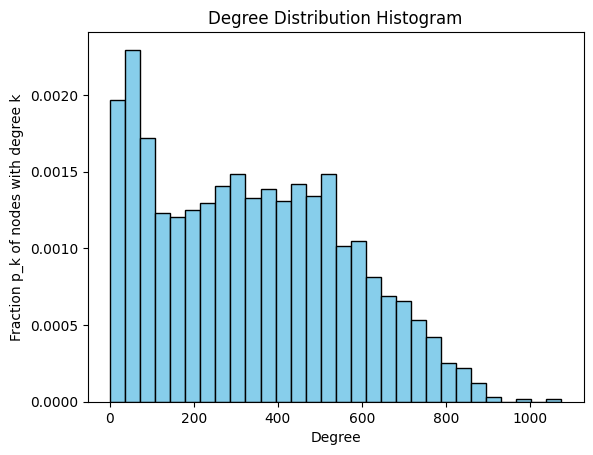

In [6]:
plot_degree_distribution(graph)

# Erdos-renyi

In [4]:
def generate_er_graph(number_of_nodes, probability_of_edge):
    return nx.erdos_renyi_graph(number_of_nodes, probability_of_edge)

num_edges = len(graph.edges())
number_of_nodes = len(graph.nodes())

probability_of_edge = num_edges / (number_of_nodes * (number_of_nodes - 1) / 2)
print("Edge Probability: ", probability_of_edge)
erdos_renyi_models = [generate_er_graph(number_of_nodes, probability_of_edge) for _ in range(5)]

for i, er_graph in enumerate(erdos_renyi_models):
    print(f"Graph {i + 1} - Number of Nodes: {len(er_graph.nodes)}, Number of Edges: {len(er_graph.edges)}")
    print("is connected:", nx.is_connected(er_graph))

    degree_er = np.mean([degree for node, degree in nx.degree(er_graph)])
    avg_degrees_er = nx.average_neighbor_degree(er_graph)
    avg_degree_of_neighbors_er = np.mean(list(avg_degrees_er.values()))

    friendship_paradox_satisfied_er = degree_er < avg_degree_of_neighbors_er
    print("ER Model {} - Average degree: {} Avg Neighbour Degree: {}".format(i, degree_er, avg_degree_of_neighbors_er))
    print(f"Friendship Paradox is satisfied in Erdos-Renyi Model {i + 1}: {friendship_paradox_satisfied_er}")


Edge Probability:  0.18979174408473884
Graph 1 - Number of Nodes: 1790, Number of Edges: 304824
is connected: True
ER Model 0 - Average degree: 340.5854748603352 Avg Neighbour Degree: 341.3974405659806
Friendship Paradox is satisfied in Erdos-Renyi Model 1: True
Graph 2 - Number of Nodes: 1790, Number of Edges: 303575
is connected: True
ER Model 1 - Average degree: 339.1899441340782 Avg Neighbour Degree: 339.99205200935455
Friendship Paradox is satisfied in Erdos-Renyi Model 2: True
Graph 3 - Number of Nodes: 1790, Number of Edges: 303617
is connected: True
ER Model 2 - Average degree: 339.23687150837986 Avg Neighbour Degree: 340.0413926227186
Friendship Paradox is satisfied in Erdos-Renyi Model 3: True
Graph 4 - Number of Nodes: 1790, Number of Edges: 303143
is connected: True
ER Model 3 - Average degree: 338.7072625698324 Avg Neighbour Degree: 339.5156188839426
Friendship Paradox is satisfied in Erdos-Renyi Model 4: True
Graph 5 - Number of Nodes: 1790, Number of Edges: 303556
is con

ER Model 0


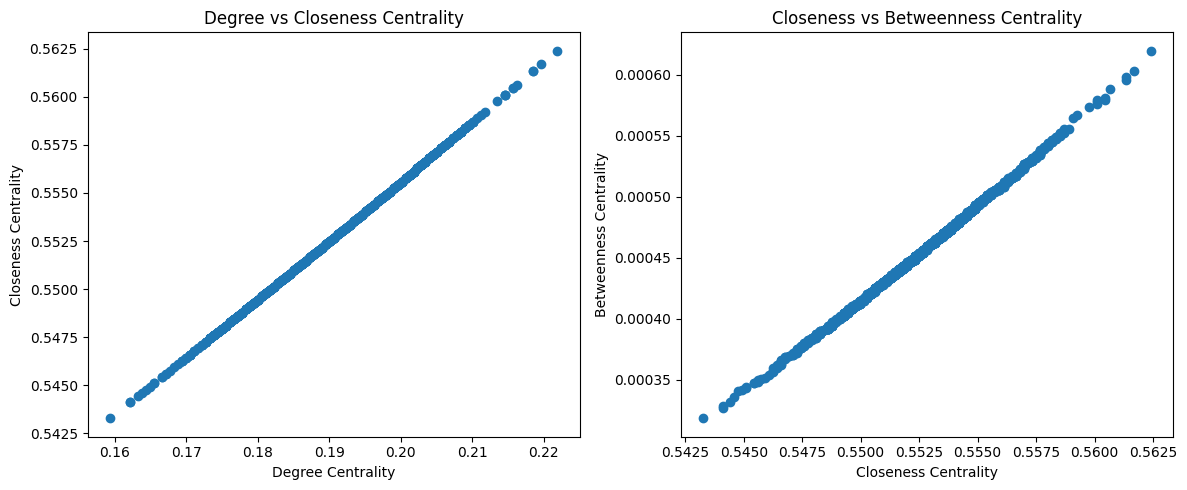

ER Model 1


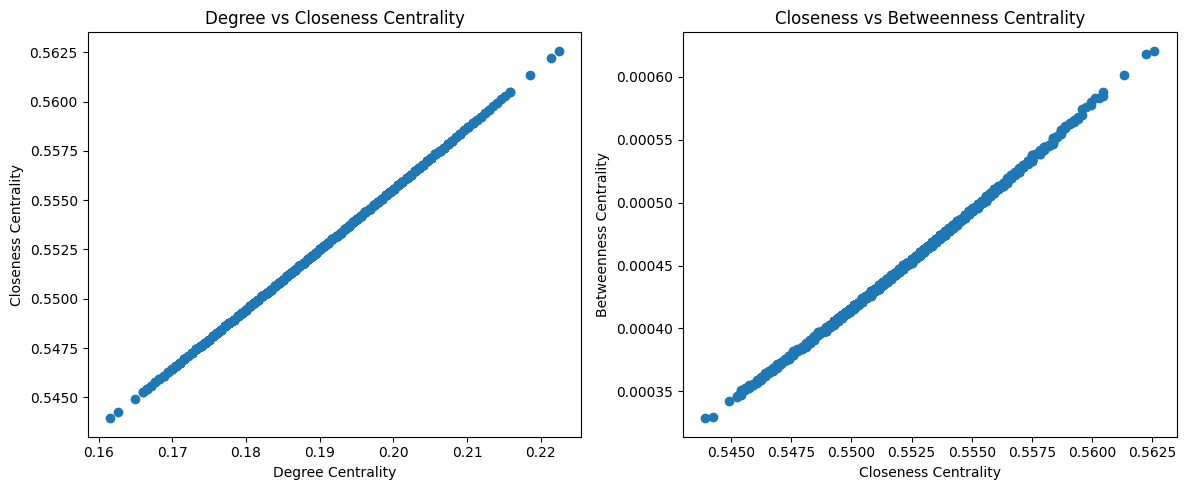

ER Model 2


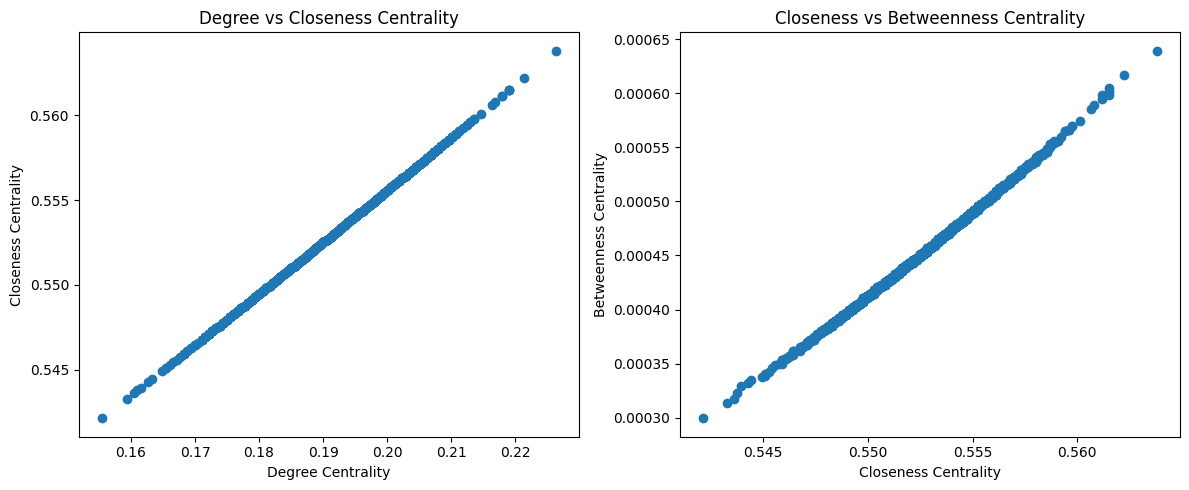

ER Model 3


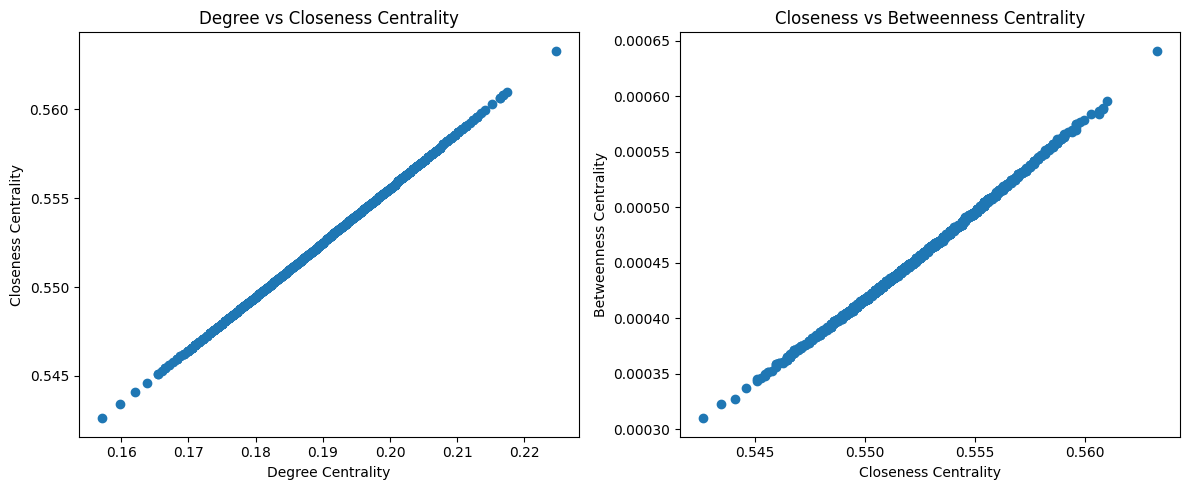

ER Model 4


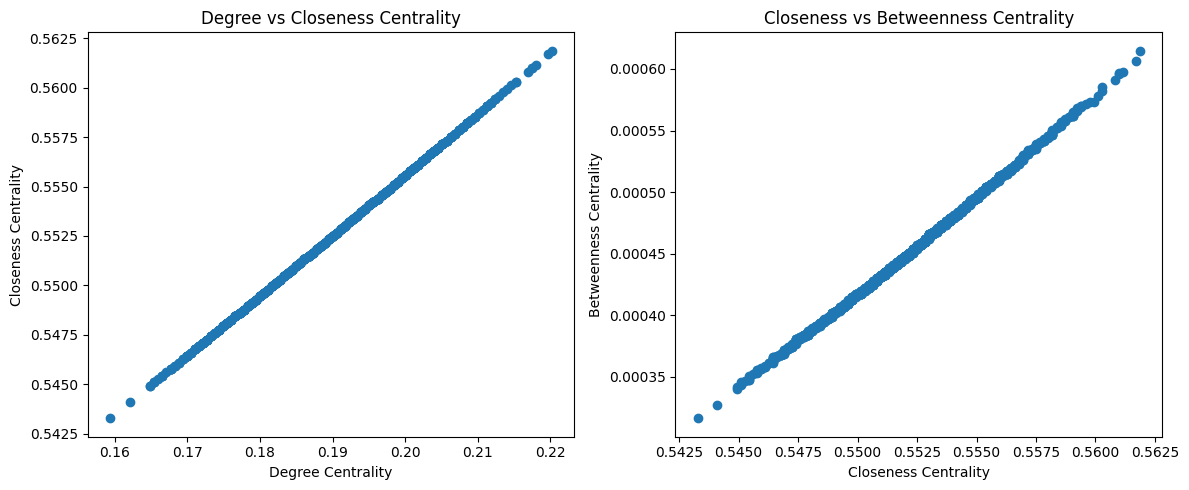

In [11]:
for index, er_graph in enumerate(erdos_renyi_models):
    print("ER Model {}".format(index))
    d_c = nx.degree_centrality(er_graph)
    d_c = dict(sorted(d_c.items(), key=lambda item: item[1], reverse=True))

    c_c = nx.closeness_centrality(er_graph)
    c_c = dict(sorted(c_c.items(), key=lambda item: item[1], reverse=True))

    b_c = nx.betweenness_centrality(er_graph)
    b_c = dict(sorted(b_c.items(), key=lambda item: item[1], reverse=True))

    e_v = nx.eigenvector_centrality(er_graph)
    e_v = dict(sorted(e_v.items(), key=lambda item: item[1], reverse=True))

    pg_c = nx.pagerank(er_graph)
    pg_c = dict(sorted(pg_c.items(), key=lambda item: item[1], reverse=True))

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # First scatter plot (Degree vs Closeness Centrality)
    axs[0].scatter(list(d_c.values()), list(c_c.values()))
    axs[0].set_xlabel("Degree Centrality")
    axs[0].set_ylabel("Closeness Centrality")
    axs[0].set_title("Degree vs Closeness Centrality")

    # Second scatter plot (Closeness vs Betweenness Centrality)
    axs[1].scatter(list(c_c.values()), list(b_c.values()))
    axs[1].set_xlabel("Closeness Centrality")
    axs[1].set_ylabel("Betweenness Centrality")
    axs[1].set_title("Closeness vs Betweenness Centrality")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

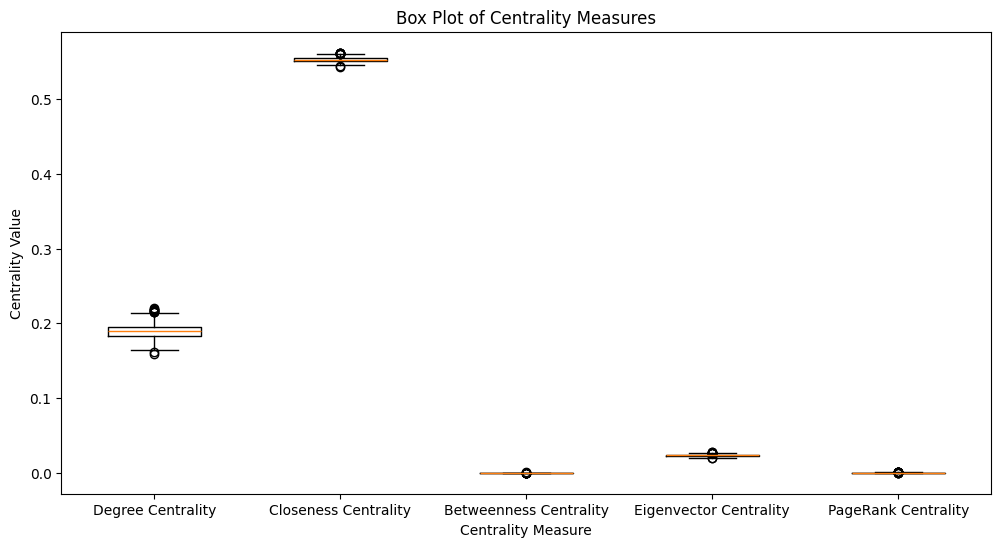

In [13]:
centrality_values = [list(d_c.values()), list(c_c.values()), list(b_c.values()), list(e_v.values()), list(pg_c.values())]

plt.figure(figsize=(12, 6))

# Create a box plot
plt.boxplot(centrality_values, labels=['Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality', 'Eigenvector Centrality', 'PageRank Centrality'])

# Add labels and title
plt.xlabel("Centrality Measure")
plt.ylabel("Centrality Value")
plt.title("Box Plot of Centrality Measures")

# Show the plot
plt.show()

In [14]:
def calculate_average_path_length_and_clustering(graph):
    try:
        # Calculate average path length
        avg_path_length = nx.average_shortest_path_length(graph)
    except nx.NetworkXError:  # Catch error if the graph is not connected
        avg_path_length = float('inf')  # Assign infinity if the graph is not connected

    # Calculate average clustering coefficient
    avg_clustering_coefficient = nx.average_clustering(graph)

    return avg_path_length, avg_clustering_coefficient

In [15]:
calculate_average_path_length_and_clustering(graph)

(1.8380569026733826, 0.46162078856886757)

In [35]:
for er_graph in erdos_renyi_models:
    # Example usage with a random graph
    avg_path_length, avg_clustering_coefficient = calculate_average_path_length_and_clustering(er_graph)

    print("Average Path Length:", avg_path_length)
    print("Average Clustering Coefficient:", avg_clustering_coefficient)


Average Path Length: 1.810410609841021
Average Clustering Coefficient: 0.18961756764783272
Average Path Length: 1.810077725142163
Average Clustering Coefficient: 0.19003183210481994
Average Path Length: 1.8107722238009436
Average Clustering Coefficient: 0.18926712721987876
Average Path Length: 1.8105936027430198
Average Clustering Coefficient: 0.18952437725281798
Average Path Length: 1.8102719599289263
Average Clustering Coefficient: 0.18959523115397


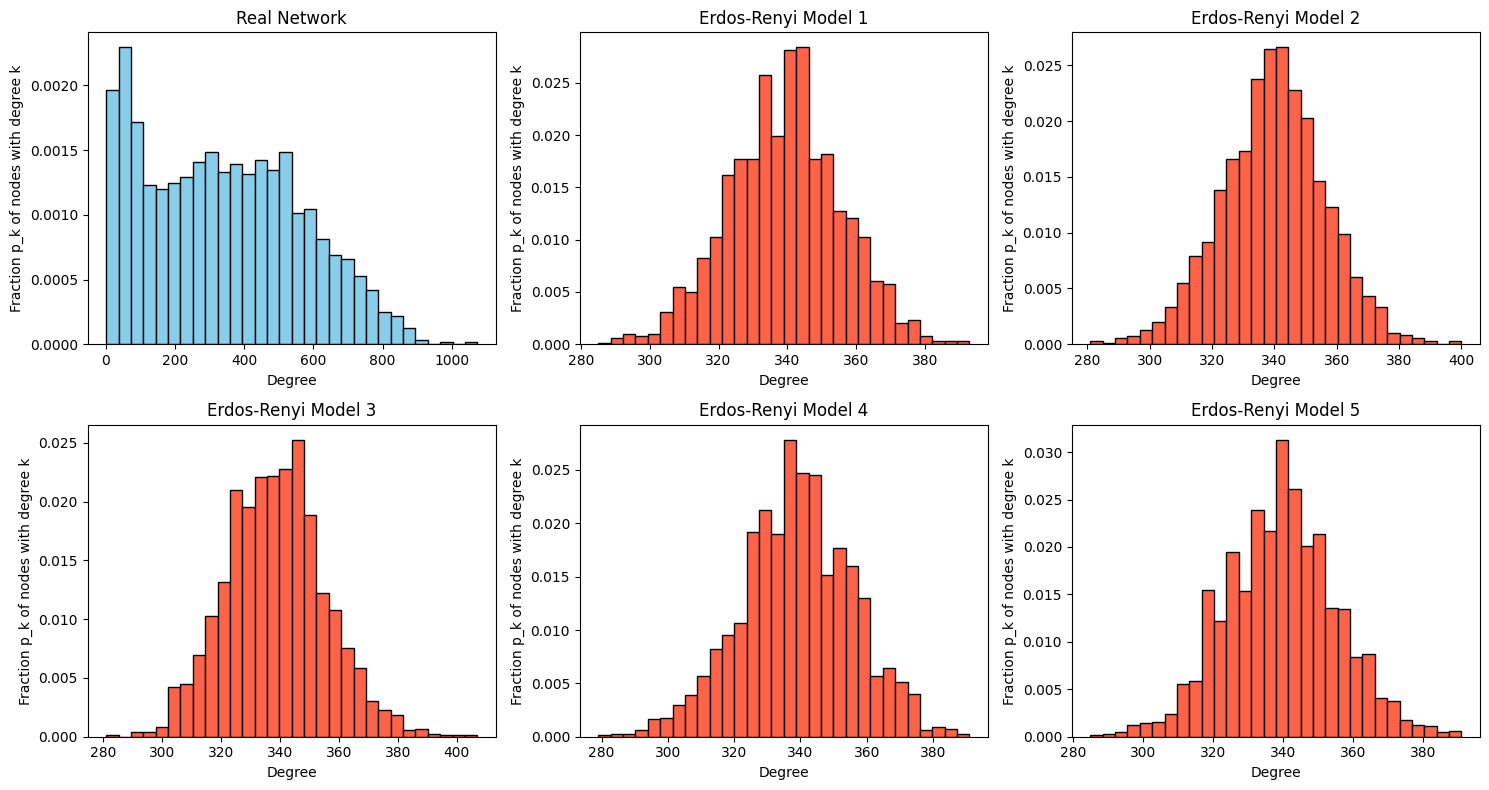

In [36]:
def plot_degree_distribution(graph, ax, color='skyblue'):
    degrees = [degree for node, degree in nx.degree(graph)]
    n, bins, patches = ax.hist(degrees, bins=30, density=True, color=color, edgecolor='black')

    ax.set_ylabel('Fraction p_k of nodes with degree k')
    ax.set_xlabel('Degree')
    ax.set_title('Degree Distribution')

# Create a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Plot the degree distribution for the real network
plot_degree_distribution(graph, axes[0, 0], color='skyblue')
axes[0, 0].set_title('Real Network')

# Plot the degree distributions for the Erdos-Renyi models
for i in range(1, 6):
    plot_degree_distribution(erdos_renyi_models[i-1], axes[i//3, i%3], color='tomato')
    axes[i//3, i%3].set_title(f'Erdos-Renyi Model {i}')

# Adjust layout
plt.tight_layout()

# Show the entire figure
plt.show()

In [5]:
def generate_configuration_model(real_graph):
    degrees = dict(real_graph.degree())
    configuration_model = nx.configuration_model(list(degrees.values()))
    return configuration_model

configuration_models = [generate_configuration_model(graph) for _ in range(8)]

for i, cn_graph in enumerate(configuration_models):
    print(f"Graph {i + 1} - Number of Nodes: {len(cn_graph.nodes)}, Number of Edges: {len(cn_graph.edges)}")
    print("is connected:", nx.is_connected(cn_graph))

    degree_c = np.mean([degree for node, degree in nx.degree(cn_graph)])
    avg_degrees_config = nx.average_neighbor_degree(cn_graph)
    avg_degree_of_neighbors_config = np.mean(list(avg_degrees_config.values()))
    friendship_paradox_satisfied_config = degree_c < avg_degree_of_neighbors_config
    print("Configuration Model {} - Average degree: {} Avg Neighbour Degree: {}".format(i, degree_c, avg_degree_of_neighbors_config))
    print(f"Friendship Paradox is satisfied in Configuration Model {i + 1}: {friendship_paradox_satisfied_config}")

Graph 1 - Number of Nodes: 1790, Number of Edges: 303886
is connected: True
Configuration Model 0 - Average degree: 339.5374301675978 Avg Neighbour Degree: 421.22585462098357
Friendship Paradox is satisfied in Configuration Model 1: True
Graph 2 - Number of Nodes: 1790, Number of Edges: 303886
is connected: True
Configuration Model 1 - Average degree: 339.5374301675978 Avg Neighbour Degree: 421.92146190176277
Friendship Paradox is satisfied in Configuration Model 2: True
Graph 3 - Number of Nodes: 1790, Number of Edges: 303886
is connected: True
Configuration Model 2 - Average degree: 339.5374301675978 Avg Neighbour Degree: 423.00795812255643
Friendship Paradox is satisfied in Configuration Model 3: True
Graph 4 - Number of Nodes: 1790, Number of Edges: 303886
is connected: True
Configuration Model 3 - Average degree: 339.5374301675978 Avg Neighbour Degree: 422.74115547926493
Friendship Paradox is satisfied in Configuration Model 4: True
Graph 5 - Number of Nodes: 1790, Number of Edges

In [18]:
for conf_graph in configuration_models:
    # Convert multigraph to a simple graph
    simple_graph = nx.Graph(conf_graph)

    avg_path_length, avg_clustering_coefficient = calculate_average_path_length_and_clustering(simple_graph)

    print("Average Path Length:", avg_path_length)
    print("Average Clustering Coefficient:", avg_clustering_coefficient)

Average Path Length: 1.8638089379229368
Average Clustering Coefficient: 0.29558603464074273
Average Path Length: 1.8633742517120453
Average Clustering Coefficient: 0.29553908298737214
Average Path Length: 1.8641199634014196
Average Clustering Coefficient: 0.29427943948494695
Average Path Length: 1.863692771780371
Average Clustering Coefficient: 0.29477178259287745
Average Path Length: 1.8636871508379889
Average Clustering Coefficient: 0.2952076158019533
Average Path Length: 1.864134328031952
Average Clustering Coefficient: 0.29433718628517497
Average Path Length: 1.8640968550827373
Average Clustering Coefficient: 0.29461100003922136
Average Path Length: 1.8647707436194496
Average Clustering Coefficient: 0.2948217177144089


Configuration Model 0


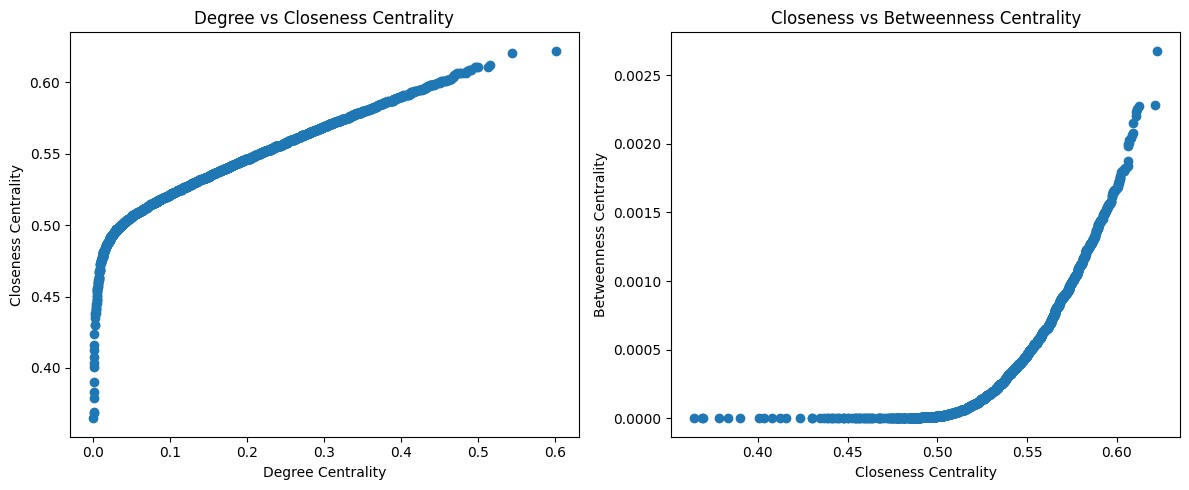

Configuration Model 1


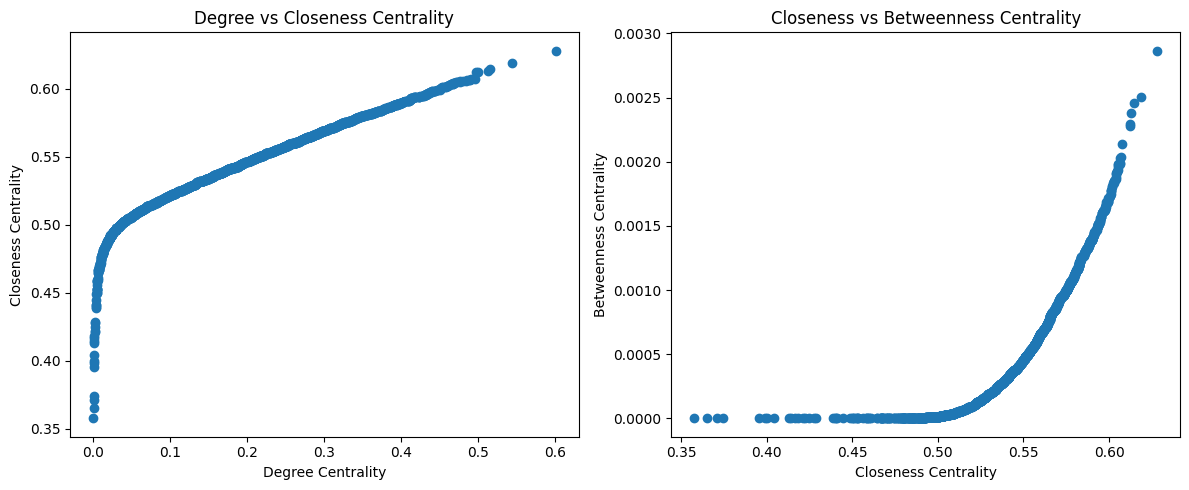

Configuration Model 2


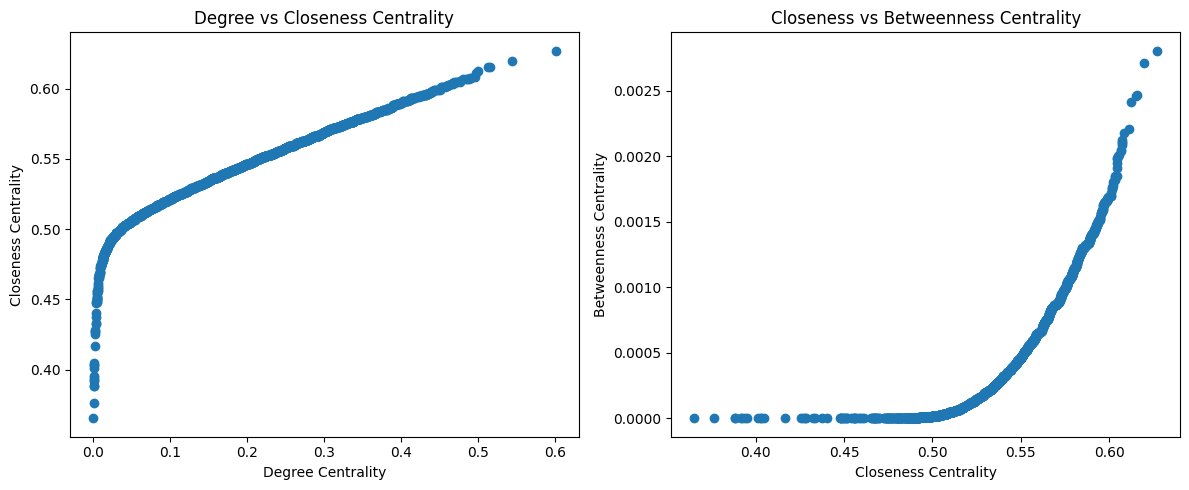

Configuration Model 3


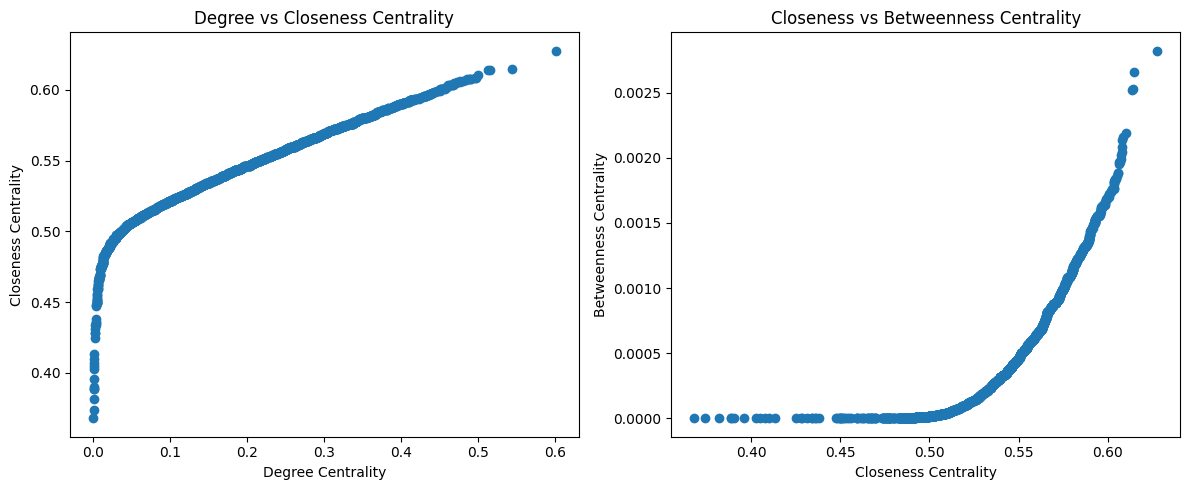

Configuration Model 4


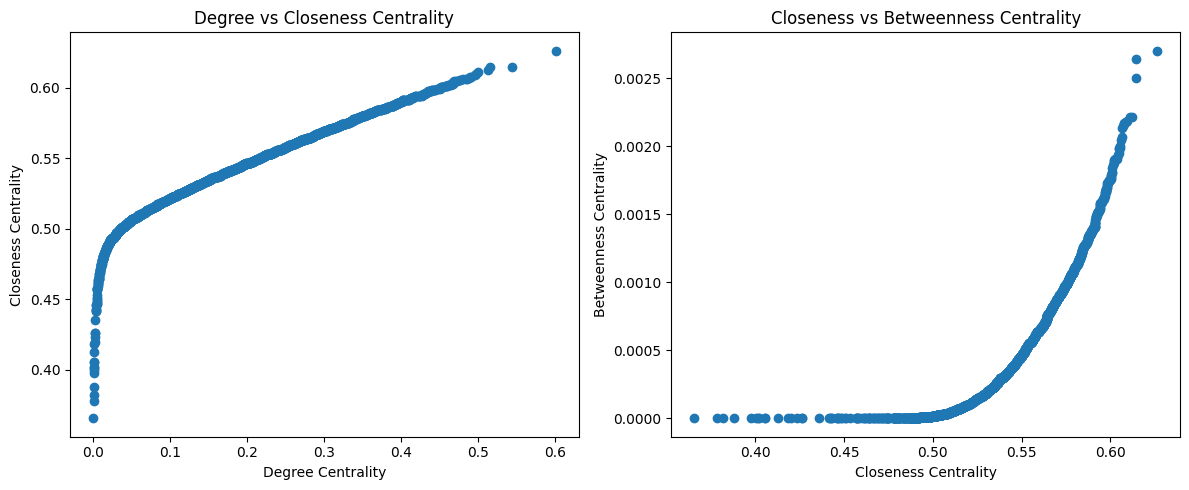

Configuration Model 5


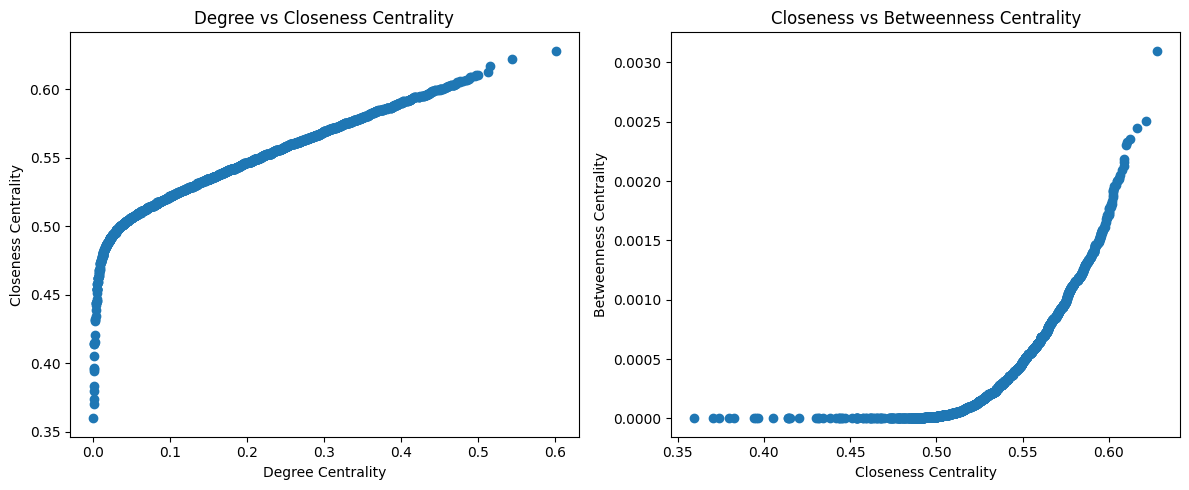

Configuration Model 6


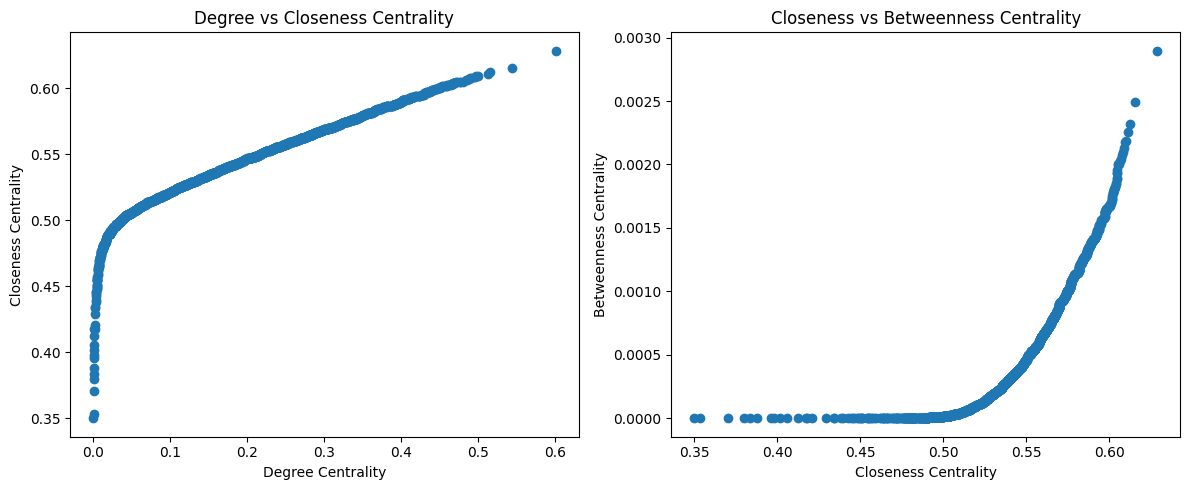

Configuration Model 7


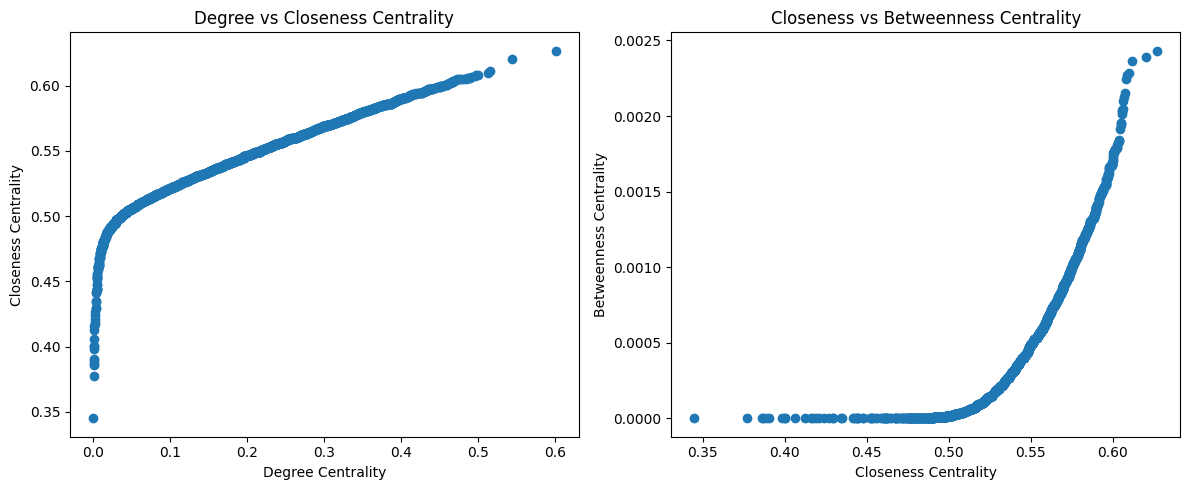

In [22]:
for index, conf_graph in enumerate(configuration_models):
    print("Configuration Model {}".format(index))
    d_c = nx.degree_centrality(conf_graph)
    d_c = dict(sorted(d_c.items(), key=lambda item: item[1], reverse=True))

    c_c = nx.closeness_centrality(conf_graph)
    c_c = dict(sorted(c_c.items(), key=lambda item: item[1], reverse=True))

    b_c = nx.betweenness_centrality(conf_graph)
    b_c = dict(sorted(b_c.items(), key=lambda item: item[1], reverse=True))

    simple_graph = nx.Graph(conf_graph)

    e_v = nx.eigenvector_centrality(simple_graph)
    e_v = dict(sorted(e_v.items(), key=lambda item: item[1], reverse=True))

    pg_c = nx.pagerank(conf_graph)
    pg_c = dict(sorted(pg_c.items(), key=lambda item: item[1], reverse=True))

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # First scatter plot (Degree vs Closeness Centrality)
    axs[0].scatter(list(d_c.values()), list(c_c.values()))
    axs[0].set_xlabel("Degree Centrality")
    axs[0].set_ylabel("Closeness Centrality")
    axs[0].set_title("Degree vs Closeness Centrality")

    # Second scatter plot (Closeness vs Betweenness Centrality)
    axs[1].scatter(list(c_c.values()), list(b_c.values()))
    axs[1].set_xlabel("Closeness Centrality")
    axs[1].set_ylabel("Betweenness Centrality")
    axs[1].set_title("Closeness vs Betweenness Centrality")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

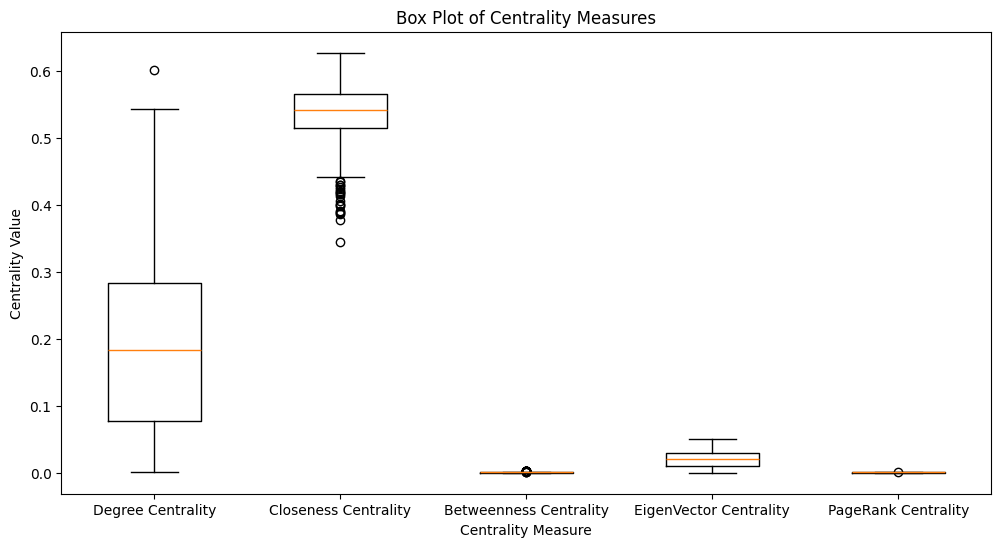

In [23]:
centrality_values = [list(d_c.values()), list(c_c.values()), list(b_c.values()), list(e_v.values()), list(pg_c.values())]

plt.figure(figsize=(12, 6))

# Create a box plot
plt.boxplot(centrality_values, labels=['Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality', "EigenVector Centrality", 'PageRank Centrality'])

# Add labels and title
plt.xlabel("Centrality Measure")
plt.ylabel("Centrality Value")
plt.title("Box Plot of Centrality Measures")

# Show the plot
plt.show()

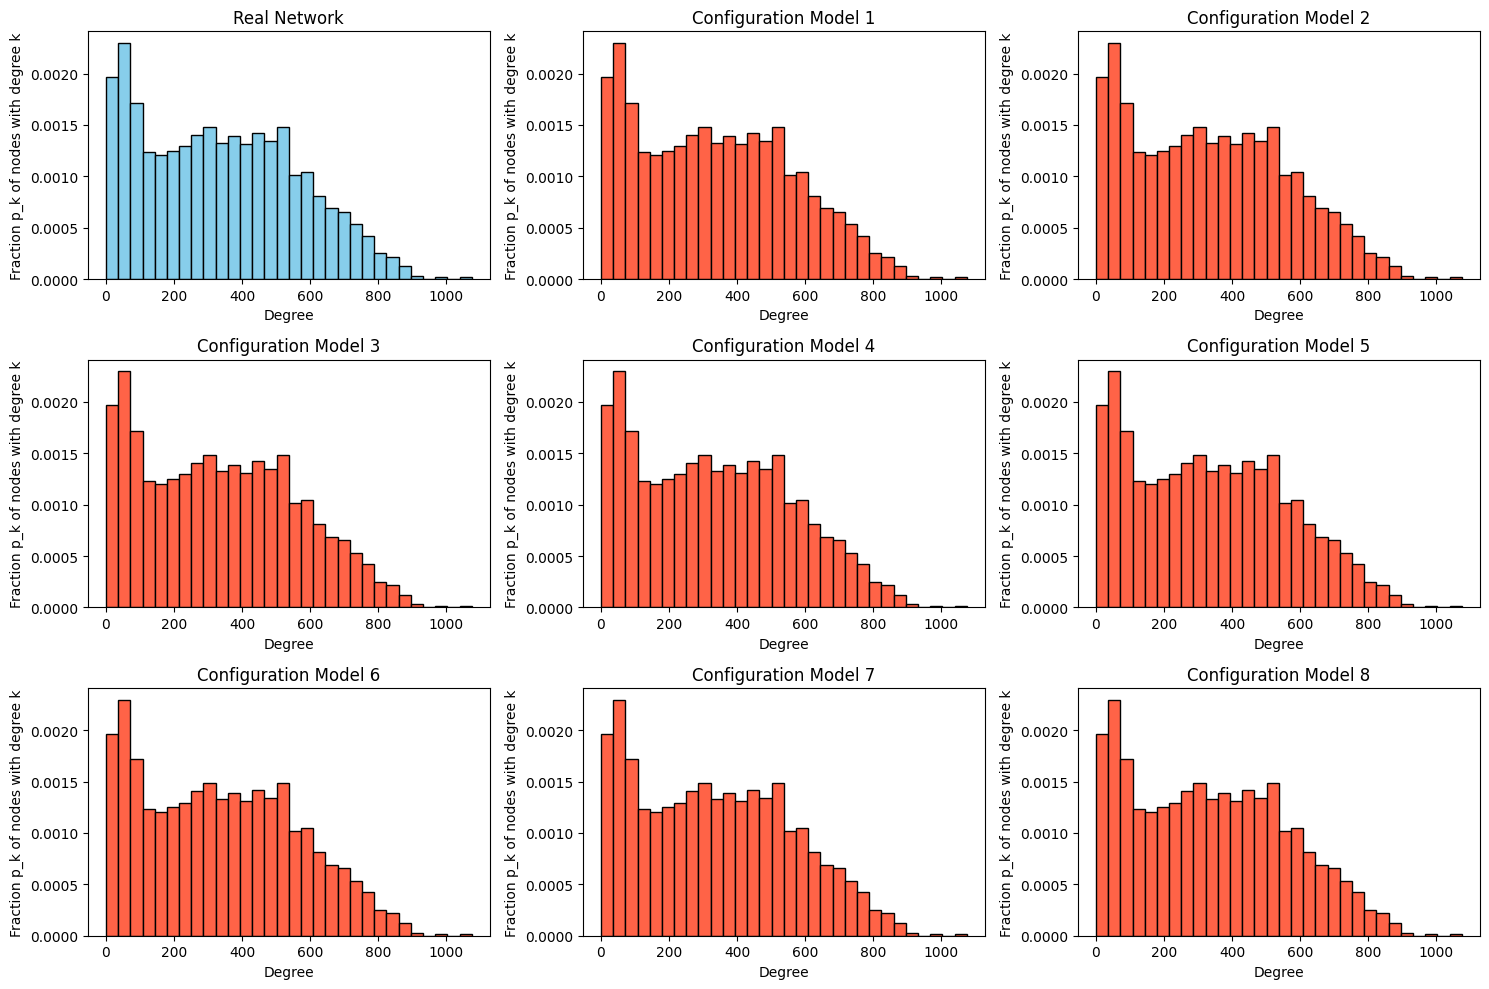

In [27]:
def plot_degree_distribution(graph, ax, color='skyblue'):
    degrees = [degree for node, degree in nx.degree(graph)]
    n, bins, patches = ax.hist(degrees, bins=30, density=True, color=color, edgecolor='black')

    ax.set_ylabel('Fraction p_k of nodes with degree k')
    ax.set_xlabel('Degree')
    ax.set_title('Degree Distribution')


fig, axes = plt.subplots(3, 3, figsize=(15, 10))

plot_degree_distribution(graph, axes[0, 0])
axes[0, 0].set_title('Real Network')

for i in range(1, 9):
    plot_degree_distribution(configuration_models[i-1], axes[i//3, i%3], color='tomato')
    axes[i//3, i%3].set_title(f'Configuration Model {i}')

# Adjust layout
plt.tight_layout()

# Show the entire figure
plt.show()


In [36]:
def detect_and_visualize_communities(G):
    # Community detection with the Louvain method
    partition = community_louvain.best_partition(G)

    # Visualization
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)  # Positioning of nodes
    # Color nodes based on community
    cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

    # Print the number of communities
    num_communities = len(set(partition.values()))
    print(f"Number of communities: {num_communities}")

    # Group nodes by community
    communities = {}
    for node, community in partition.items():
        communities.setdefault(community, []).append(node)

    # Print top 5 nodes by degree within each community
    for community, nodes in communities.items():
        print(f"\nTop 10 nodes by degree in community {community}:")
        subgraph = G.subgraph(nodes)
        top_nodes = sorted(subgraph.degree, key=lambda x: x[1], reverse=True)[:10]
        for node, degree in top_nodes:
            print(f"Node {node}, Degree: {degree}")

C:\Users\iulhaq\AppData\Local\Temp\ipykernel_1092\710013464.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)


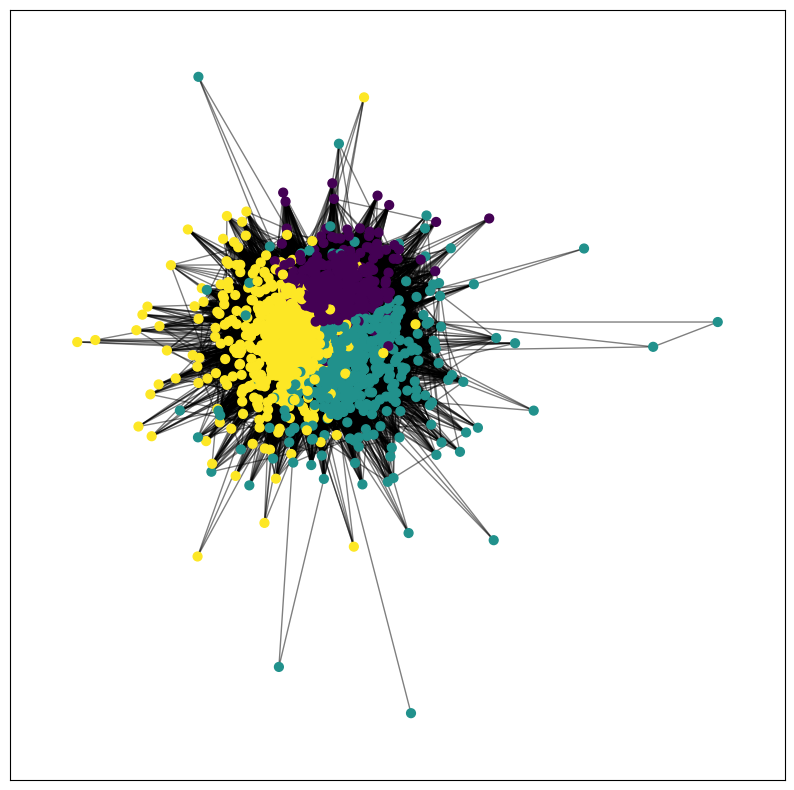

Number of communities: 3

Top 10 nodes by degree in community 0:
Node Leslie Nielsen, Degree: 398
Node Ricardo Montalban, Degree: 396
Node Ralph Bellamy, Degree: 378
Node Theodore Bikel, Degree: 377
Node Mickey Rooney, Degree: 375
Node Nina Foch, Degree: 372
Node Joan Blondell, Degree: 371
Node Patrick Macnee, Degree: 367
Node Jack Klugman, Degree: 363
Node Lew Ayres, Degree: 363

Top 10 nodes by degree in community 1:
Node John Hurt, Degree: 237
Node Anthony Hopkins, Degree: 223
Node Alfred Molina, Degree: 221
Node Michael Gough, Degree: 212
Node Judi Dench, Degree: 212
Node John Gielgud, Degree: 211
Node Michael Gambon, Degree: 210
Node Ian Holm, Degree: 207
Node Jim Broadbent, Degree: 205
Node Helen Mirren, Degree: 200

Top 10 nodes by degree in community 2:
Node Ed Begley Jr., Degree: 638
Node Robert Picardo, Degree: 603
Node Steven Weber, Degree: 585
Node David Paymer, Degree: 571
Node Bruce Davison, Degree: 569
Node Caroline Aaron, Degree: 553
Node Brent Spiner, Degree: 551
Node 

In [38]:
seed = 40
random.seed(seed)
detect_and_visualize_communities(graph)

ER Model {} 0


C:\Users\iulhaq\AppData\Local\Temp\ipykernel_1092\710013464.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)


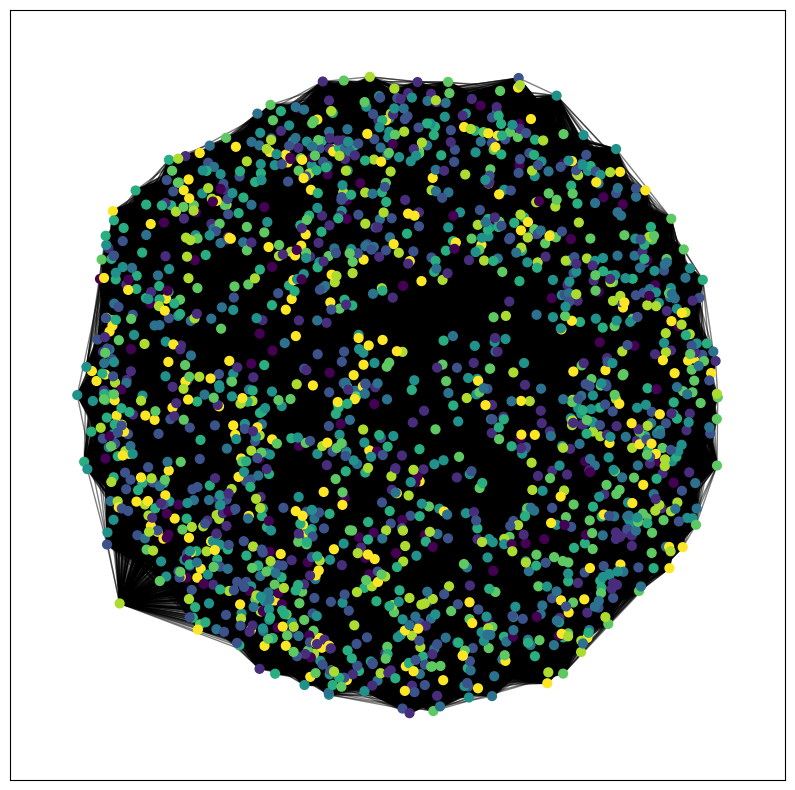

Number of communities: 9

Top 10 nodes by degree in community 6:
Node 1407, Degree: 73
Node 773, Degree: 72
Node 514, Degree: 71
Node 1697, Degree: 66
Node 553, Degree: 63
Node 1264, Degree: 63
Node 585, Degree: 62
Node 1540, Degree: 61
Node 1594, Degree: 61
Node 1112, Degree: 61

Top 10 nodes by degree in community 4:
Node 1509, Degree: 73
Node 489, Degree: 73
Node 1535, Degree: 72
Node 1123, Degree: 72
Node 1303, Degree: 71
Node 497, Degree: 71
Node 1654, Degree: 70
Node 1744, Degree: 70
Node 722, Degree: 70
Node 425, Degree: 70

Top 10 nodes by degree in community 0:
Node 1051, Degree: 43
Node 1010, Degree: 41
Node 1543, Degree: 40
Node 1327, Degree: 39
Node 162, Degree: 38
Node 1255, Degree: 38
Node 399, Degree: 38
Node 416, Degree: 38
Node 600, Degree: 37
Node 414, Degree: 37

Top 10 nodes by degree in community 5:
Node 1733, Degree: 67
Node 909, Degree: 67
Node 1399, Degree: 66
Node 546, Degree: 65
Node 576, Degree: 65
Node 253, Degree: 65
Node 1338, Degree: 65
Node 968, Degree: 

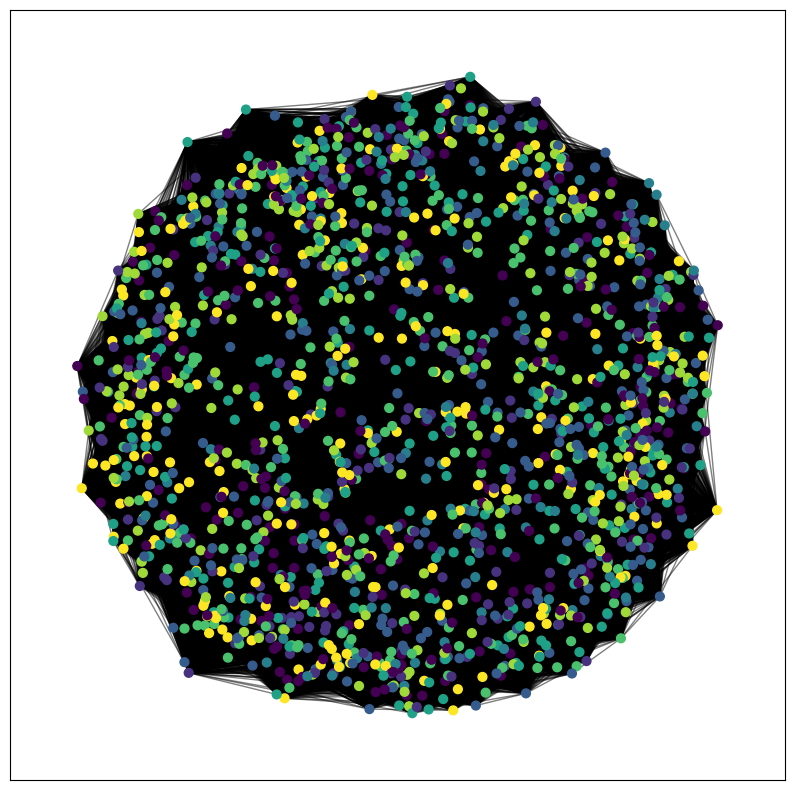

Number of communities: 8

Top 10 nodes by degree in community 2:
Node 1600, Degree: 80
Node 178, Degree: 80
Node 520, Degree: 78
Node 1075, Degree: 78
Node 146, Degree: 78
Node 190, Degree: 78
Node 1273, Degree: 78
Node 153, Degree: 77
Node 1757, Degree: 77
Node 840, Degree: 77

Top 10 nodes by degree in community 4:
Node 603, Degree: 70
Node 19, Degree: 69
Node 1560, Degree: 69
Node 1605, Degree: 68
Node 668, Degree: 68
Node 1206, Degree: 68
Node 714, Degree: 68
Node 1297, Degree: 68
Node 908, Degree: 68
Node 1701, Degree: 67

Top 10 nodes by degree in community 3:
Node 577, Degree: 46
Node 17, Degree: 45
Node 380, Degree: 45
Node 905, Degree: 45
Node 223, Degree: 43
Node 1419, Degree: 42
Node 538, Degree: 41
Node 872, Degree: 41
Node 1478, Degree: 41
Node 1650, Degree: 40

Top 10 nodes by degree in community 1:
Node 1306, Degree: 54
Node 838, Degree: 54
Node 364, Degree: 54
Node 1053, Degree: 53
Node 1201, Degree: 52
Node 1289, Degree: 52
Node 1469, Degree: 52
Node 1609, Degree: 51
N

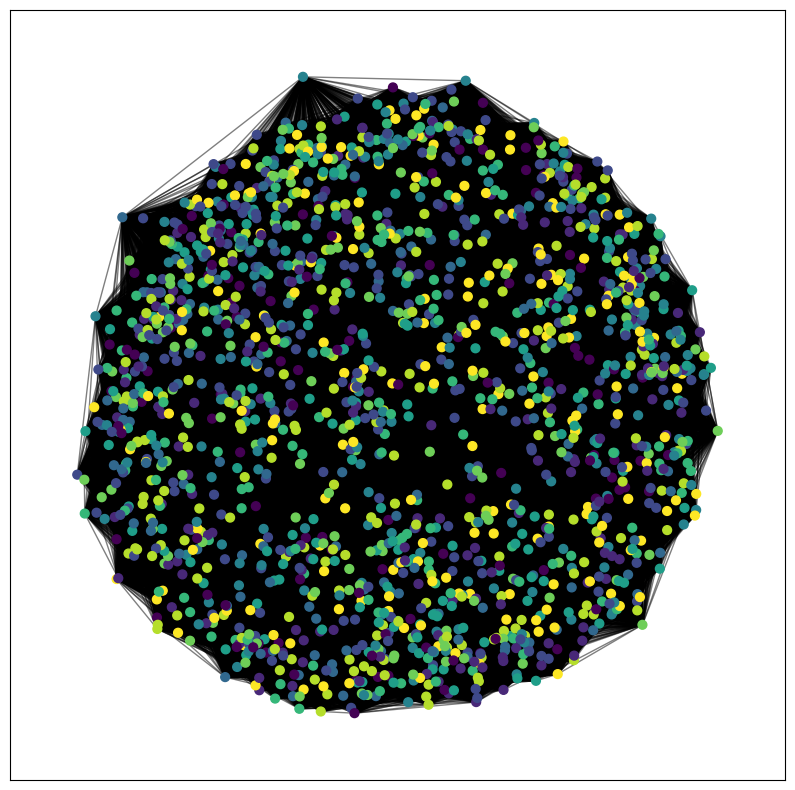

Number of communities: 10

Top 10 nodes by degree in community 6:
Node 113, Degree: 57
Node 756, Degree: 57
Node 134, Degree: 55
Node 906, Degree: 55
Node 397, Degree: 55
Node 992, Degree: 55
Node 1515, Degree: 55
Node 1250, Degree: 54
Node 292, Degree: 54
Node 1701, Degree: 53

Top 10 nodes by degree in community 9:
Node 1607, Degree: 65
Node 205, Degree: 63
Node 1183, Degree: 62
Node 324, Degree: 62
Node 1170, Degree: 60
Node 189, Degree: 60
Node 1398, Degree: 60
Node 1471, Degree: 60
Node 1581, Degree: 59
Node 902, Degree: 59

Top 10 nodes by degree in community 7:
Node 710, Degree: 51
Node 754, Degree: 50
Node 383, Degree: 48
Node 1450, Degree: 48
Node 517, Degree: 47
Node 393, Degree: 47
Node 524, Degree: 46
Node 1361, Degree: 46
Node 892, Degree: 46
Node 1162, Degree: 45

Top 10 nodes by degree in community 3:
Node 1287, Degree: 52
Node 667, Degree: 51
Node 306, Degree: 50
Node 405, Degree: 50
Node 1565, Degree: 49
Node 700, Degree: 49
Node 375, Degree: 49
Node 416, Degree: 49
No

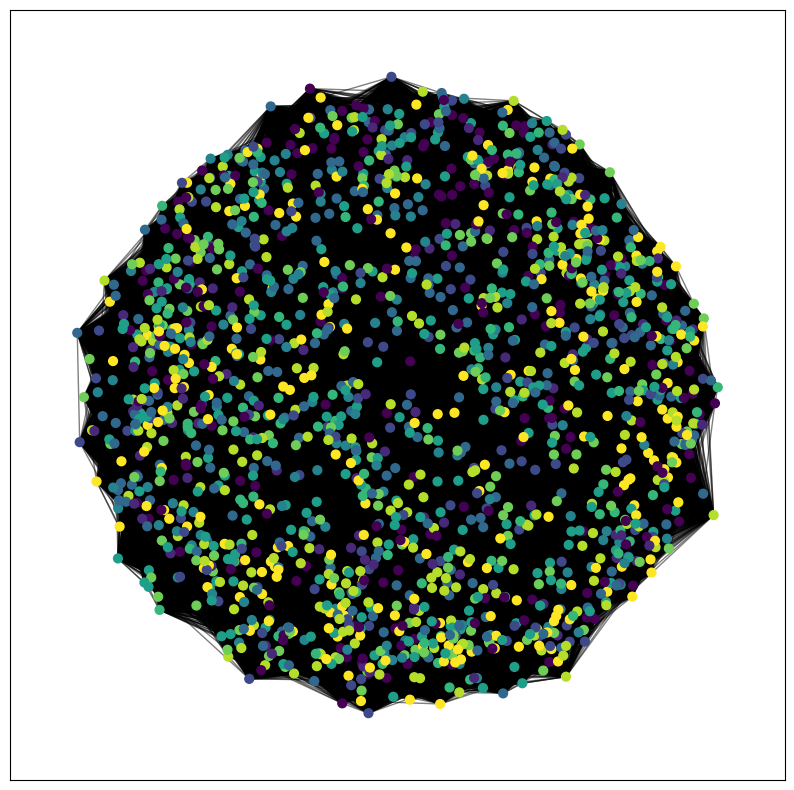

Number of communities: 10

Top 10 nodes by degree in community 3:
Node 861, Degree: 78
Node 1703, Degree: 74
Node 660, Degree: 72
Node 296, Degree: 72
Node 817, Degree: 72
Node 935, Degree: 71
Node 1061, Degree: 70
Node 1567, Degree: 69
Node 1083, Degree: 69
Node 184, Degree: 69

Top 10 nodes by degree in community 5:
Node 812, Degree: 82
Node 30, Degree: 77
Node 466, Degree: 77
Node 1590, Degree: 76
Node 75, Degree: 75
Node 1210, Degree: 75
Node 823, Degree: 75
Node 1395, Degree: 75
Node 979, Degree: 75
Node 484, Degree: 75

Top 10 nodes by degree in community 7:
Node 1201, Degree: 56
Node 1707, Degree: 55
Node 1320, Degree: 55
Node 233, Degree: 54
Node 1496, Degree: 54
Node 1024, Degree: 53
Node 1050, Degree: 53
Node 361, Degree: 53
Node 1135, Degree: 52
Node 1765, Degree: 52

Top 10 nodes by degree in community 9:
Node 862, Degree: 74
Node 439, Degree: 73
Node 152, Degree: 72
Node 686, Degree: 72
Node 1370, Degree: 71
Node 1426, Degree: 70
Node 645, Degree: 69
Node 1257, Degree: 69


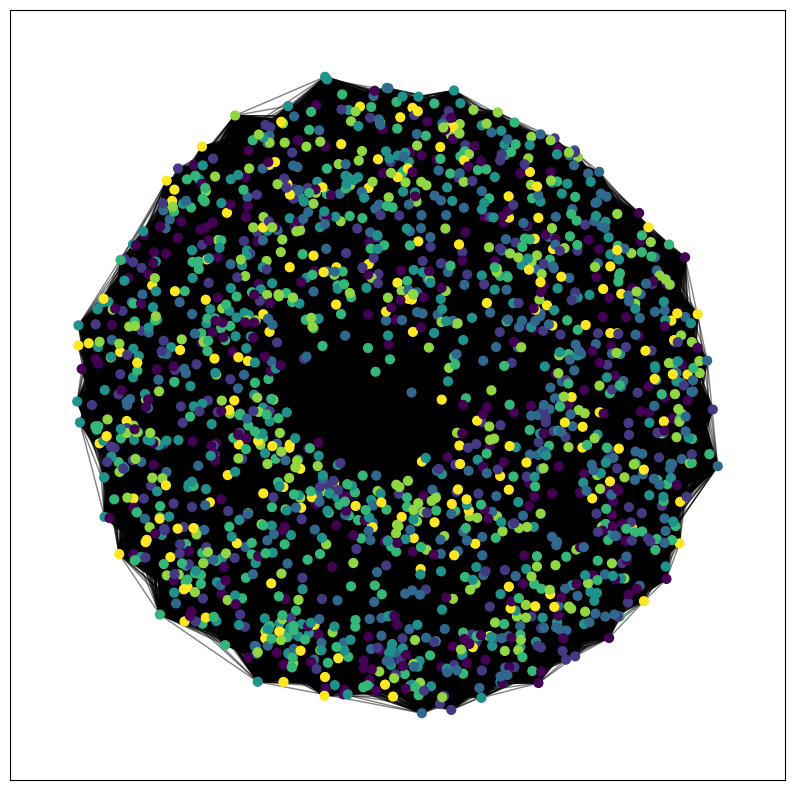

Number of communities: 7

Top 10 nodes by degree in community 1:
Node 718, Degree: 71
Node 1059, Degree: 70
Node 1105, Degree: 67
Node 1285, Degree: 67
Node 1063, Degree: 66
Node 557, Degree: 66
Node 1676, Degree: 64
Node 1349, Degree: 64
Node 858, Degree: 64
Node 1095, Degree: 63

Top 10 nodes by degree in community 5:
Node 143, Degree: 77
Node 1422, Degree: 76
Node 1116, Degree: 75
Node 105, Degree: 75
Node 53, Degree: 74
Node 833, Degree: 74
Node 1154, Degree: 73
Node 458, Degree: 73
Node 1147, Degree: 72
Node 1737, Degree: 72

Top 10 nodes by degree in community 6:
Node 1602, Degree: 58
Node 44, Degree: 57
Node 913, Degree: 57
Node 529, Degree: 56
Node 1007, Degree: 56
Node 82, Degree: 55
Node 1143, Degree: 55
Node 149, Degree: 55
Node 56, Degree: 54
Node 1695, Degree: 54

Top 10 nodes by degree in community 2:
Node 125, Degree: 90
Node 450, Degree: 90
Node 1039, Degree: 89
Node 543, Degree: 89
Node 956, Degree: 86
Node 487, Degree: 86
Node 76, Degree: 85
Node 1002, Degree: 85
Node

In [39]:
for index, er_model in enumerate(erdos_renyi_models):
    print("ER Model {}", format(index))

    detect_and_visualize_communities(er_model)

Configuration Model 0


C:\Users\iulhaq\AppData\Local\Temp\ipykernel_1092\710013464.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)


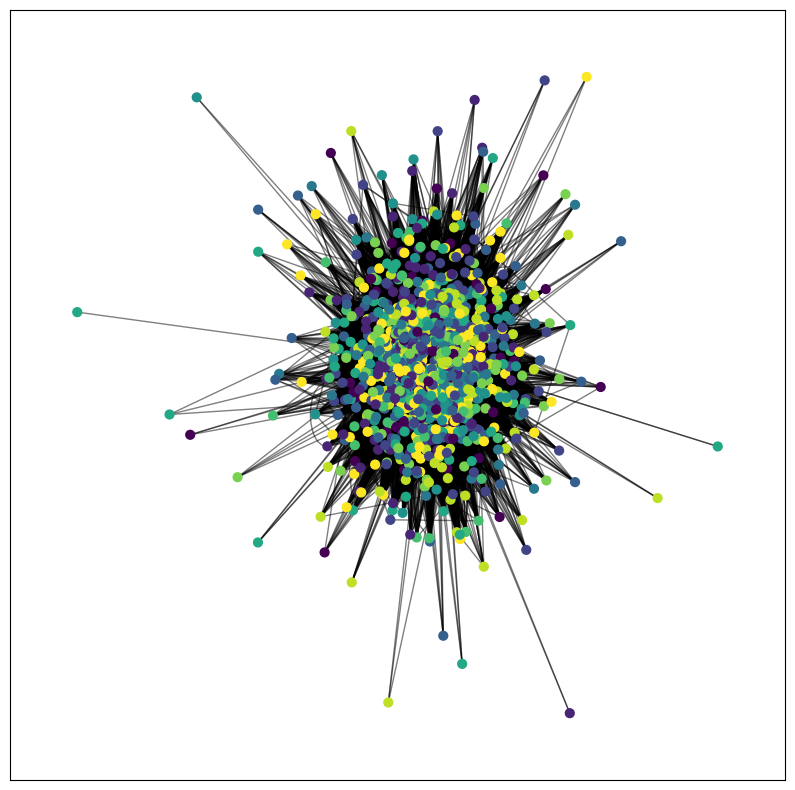

Number of communities: 11

Top 10 nodes by degree in community 0:
Node 925, Degree: 91
Node 566, Degree: 90
Node 24, Degree: 85
Node 1256, Degree: 81
Node 797, Degree: 81
Node 1019, Degree: 81
Node 1511, Degree: 79
Node 152, Degree: 77
Node 1536, Degree: 76
Node 1088, Degree: 72

Top 10 nodes by degree in community 1:
Node 849, Degree: 130
Node 784, Degree: 109
Node 480, Degree: 104
Node 1516, Degree: 104
Node 1186, Degree: 103
Node 1375, Degree: 101
Node 1085, Degree: 98
Node 1174, Degree: 98
Node 1073, Degree: 95
Node 611, Degree: 95

Top 10 nodes by degree in community 2:
Node 746, Degree: 116
Node 1595, Degree: 100
Node 1524, Degree: 95
Node 340, Degree: 94
Node 1460, Degree: 89
Node 1253, Degree: 87
Node 602, Degree: 86
Node 383, Degree: 82
Node 1492, Degree: 82
Node 748, Degree: 81

Top 10 nodes by degree in community 3:
Node 514, Degree: 123
Node 137, Degree: 105
Node 1212, Degree: 102
Node 983, Degree: 102
Node 1343, Degree: 101
Node 1692, Degree: 97
Node 1250, Degree: 97
Node 

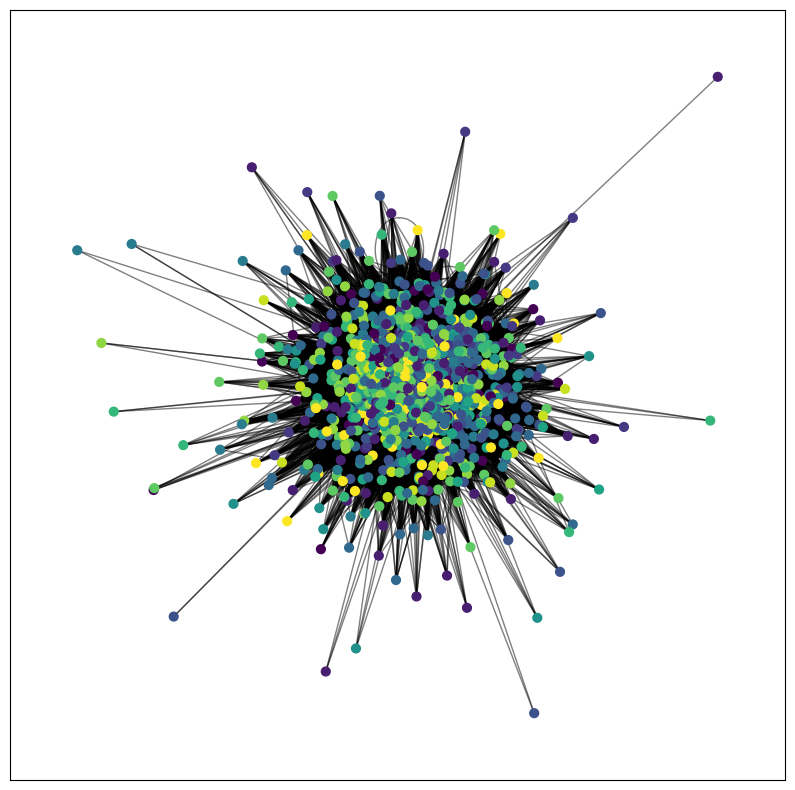

Number of communities: 13

Top 10 nodes by degree in community 0:
Node 332, Degree: 68
Node 602, Degree: 59
Node 195, Degree: 59
Node 835, Degree: 57
Node 1320, Degree: 55
Node 1110, Degree: 54
Node 153, Degree: 52
Node 1613, Degree: 49
Node 1341, Degree: 49
Node 434, Degree: 49

Top 10 nodes by degree in community 1:
Node 1203, Degree: 114
Node 740, Degree: 106
Node 784, Degree: 106
Node 1256, Degree: 105
Node 574, Degree: 103
Node 128, Degree: 103
Node 998, Degree: 103
Node 995, Degree: 100
Node 1763, Degree: 98
Node 1373, Degree: 96

Top 10 nodes by degree in community 2:
Node 1516, Degree: 59
Node 1505, Degree: 54
Node 828, Degree: 53
Node 1511, Degree: 51
Node 1304, Degree: 49
Node 143, Degree: 48
Node 892, Degree: 46
Node 909, Degree: 46
Node 1475, Degree: 45
Node 1498, Degree: 44

Top 10 nodes by degree in community 3:
Node 1692, Degree: 93
Node 859, Degree: 91
Node 566, Degree: 89
Node 714, Degree: 86
Node 417, Degree: 86
Node 1125, Degree: 82
Node 1649, Degree: 82
Node 1352, D

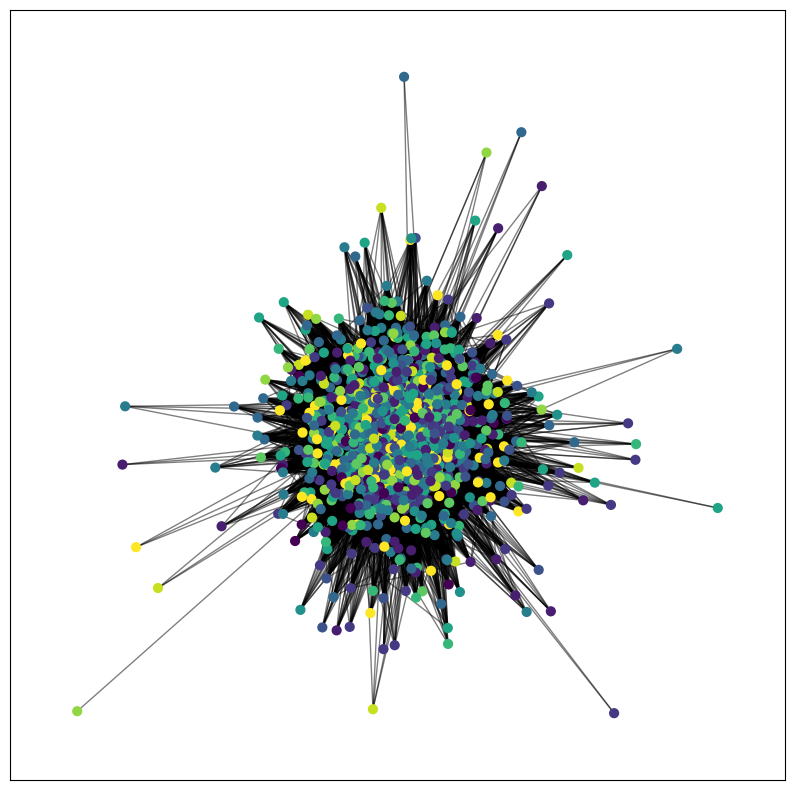

Number of communities: 13

Top 10 nodes by degree in community 10:
Node 1408, Degree: 53
Node 730, Degree: 50
Node 476, Degree: 50
Node 1078, Degree: 49
Node 1466, Degree: 49
Node 1085, Degree: 48
Node 1226, Degree: 47
Node 517, Degree: 46
Node 188, Degree: 45
Node 1295, Degree: 45

Top 10 nodes by degree in community 2:
Node 272, Degree: 107
Node 301, Degree: 106
Node 1373, Degree: 106
Node 394, Degree: 105
Node 1195, Degree: 103
Node 626, Degree: 95
Node 480, Degree: 94
Node 140, Degree: 91
Node 1253, Degree: 91
Node 773, Degree: 90

Top 10 nodes by degree in community 5:
Node 1356, Degree: 121
Node 1320, Degree: 111
Node 100, Degree: 107
Node 1139, Degree: 97
Node 1019, Degree: 94
Node 1467, Degree: 92
Node 961, Degree: 92
Node 491, Degree: 90
Node 278, Degree: 88
Node 1073, Degree: 87

Top 10 nodes by degree in community 4:
Node 956, Degree: 112
Node 514, Degree: 110
Node 1508, Degree: 108
Node 308, Degree: 107
Node 1203, Degree: 105
Node 566, Degree: 104
Node 542, Degree: 102
Node

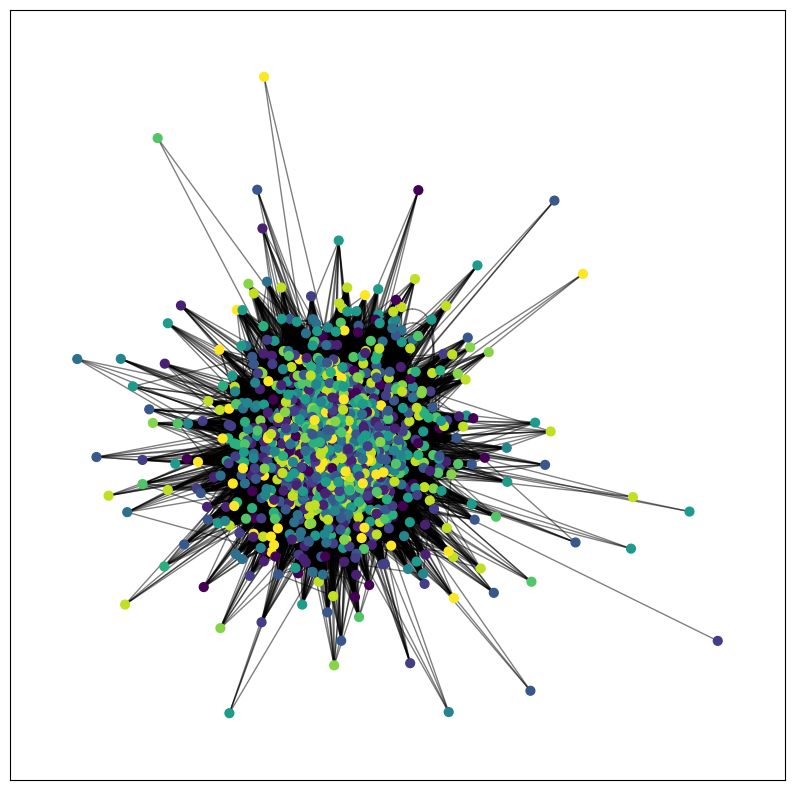

Number of communities: 12

Top 10 nodes by degree in community 4:
Node 445, Degree: 93
Node 859, Degree: 92
Node 24, Degree: 89
Node 983, Degree: 87
Node 846, Degree: 78
Node 732, Degree: 77
Node 1516, Degree: 74
Node 1753, Degree: 73
Node 845, Degree: 73
Node 1343, Degree: 72

Top 10 nodes by degree in community 7:
Node 1040, Degree: 90
Node 566, Degree: 90
Node 368, Degree: 87
Node 1125, Degree: 82
Node 1487, Degree: 81
Node 332, Degree: 80
Node 1019, Degree: 77
Node 1447, Degree: 73
Node 1648, Degree: 71
Node 1375, Degree: 71

Top 10 nodes by degree in community 11:
Node 1695, Degree: 72
Node 326, Degree: 70
Node 1277, Degree: 69
Node 278, Degree: 67
Node 1521, Degree: 64
Node 363, Degree: 63
Node 224, Degree: 62
Node 1460, Degree: 61
Node 192, Degree: 60
Node 1246, Degree: 59

Top 10 nodes by degree in community 3:
Node 925, Degree: 129
Node 1212, Degree: 114
Node 514, Degree: 112
Node 574, Degree: 111
Node 1203, Degree: 108
Node 252, Degree: 104
Node 394, Degree: 102
Node 1425, De

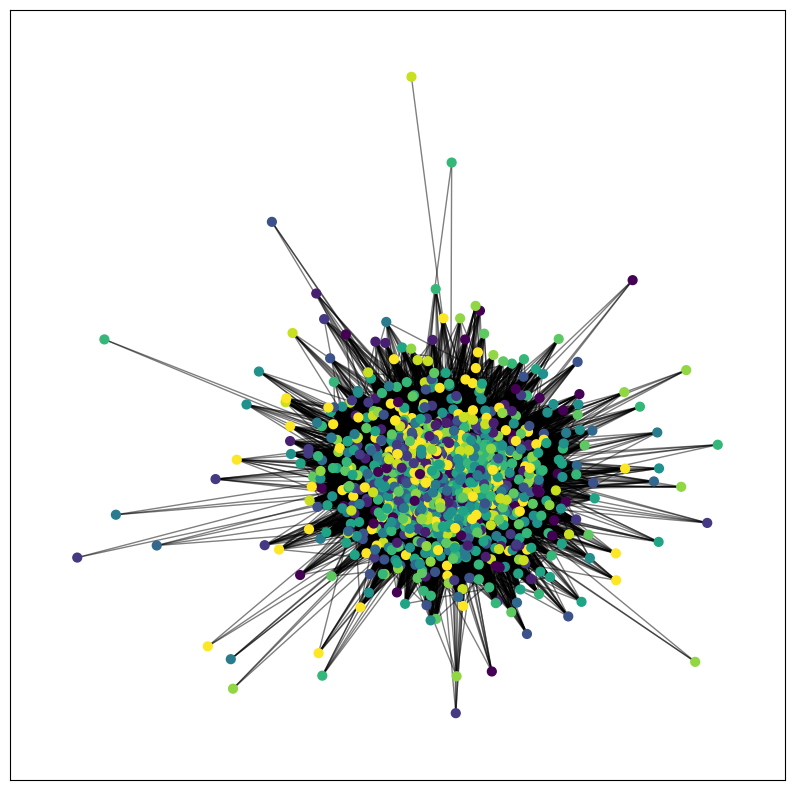

Number of communities: 13

Top 10 nodes by degree in community 6:
Node 1543, Degree: 96
Node 1356, Degree: 95
Node 983, Degree: 93
Node 715, Degree: 89
Node 372, Degree: 89
Node 956, Degree: 89
Node 1511, Degree: 87
Node 1036, Degree: 81
Node 542, Degree: 81
Node 1078, Degree: 80

Top 10 nodes by degree in community 1:
Node 368, Degree: 91
Node 24, Degree: 84
Node 456, Degree: 83
Node 491, Degree: 79
Node 574, Degree: 78
Node 1181, Degree: 78
Node 273, Degree: 76
Node 995, Degree: 76
Node 143, Degree: 74
Node 325, Degree: 73

Top 10 nodes by degree in community 10:
Node 1203, Degree: 106
Node 364, Degree: 97
Node 272, Degree: 95
Node 730, Degree: 94
Node 1528, Degree: 94
Node 1085, Degree: 92
Node 1256, Degree: 92
Node 740, Degree: 89
Node 383, Degree: 87
Node 137, Degree: 86

Top 10 nodes by degree in community 4:
Node 1695, Degree: 38
Node 1703, Degree: 38
Node 1195, Degree: 37
Node 895, Degree: 34
Node 480, Degree: 33
Node 1005, Degree: 32
Node 1022, Degree: 32
Node 278, Degree: 31


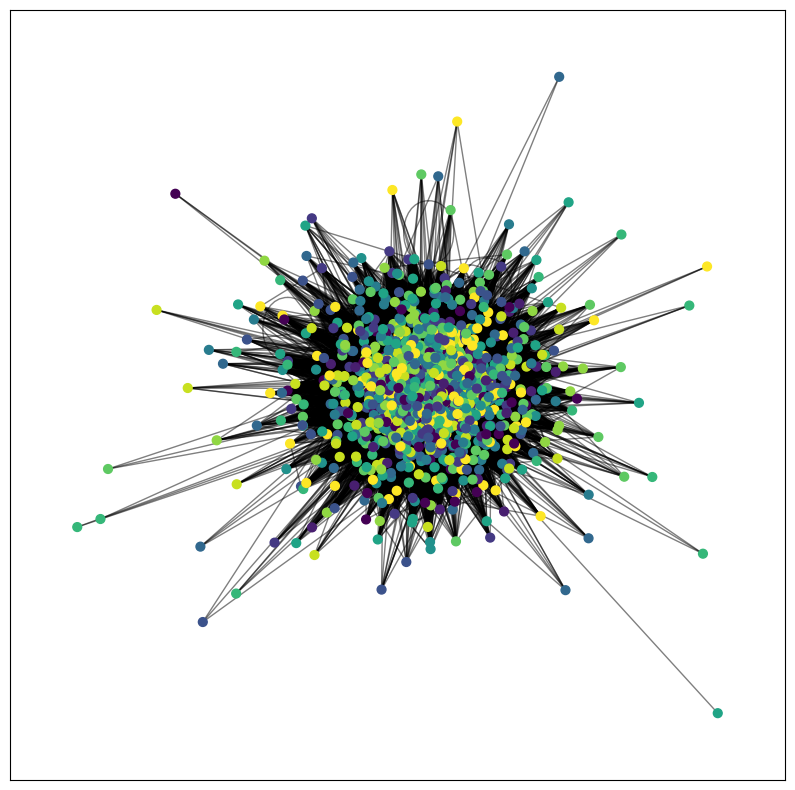

Number of communities: 13

Top 10 nodes by degree in community 0:
Node 1237, Degree: 117
Node 724, Degree: 94
Node 1766, Degree: 93
Node 272, Degree: 91
Node 326, Degree: 91
Node 1085, Degree: 90
Node 1524, Degree: 90
Node 566, Degree: 89
Node 1509, Degree: 86
Node 332, Degree: 84

Top 10 nodes by degree in community 1:
Node 1181, Degree: 60
Node 1373, Degree: 60
Node 1489, Degree: 59
Node 1371, Degree: 58
Node 137, Degree: 53
Node 378, Degree: 51
Node 1596, Degree: 50
Node 1022, Degree: 50
Node 708, Degree: 48
Node 1302, Degree: 48

Top 10 nodes by degree in community 2:
Node 1277, Degree: 101
Node 1348, Degree: 87
Node 383, Degree: 87
Node 1040, Degree: 86
Node 849, Degree: 86
Node 1425, Degree: 84
Node 1375, Degree: 83
Node 1325, Degree: 80
Node 405, Degree: 79
Node 478, Degree: 78

Top 10 nodes by degree in community 3:
Node 1508, Degree: 94
Node 364, Degree: 93
Node 394, Degree: 90
Node 514, Degree: 86
Node 574, Degree: 85
Node 24, Degree: 82
Node 1186, Degree: 82
Node 408, Degree

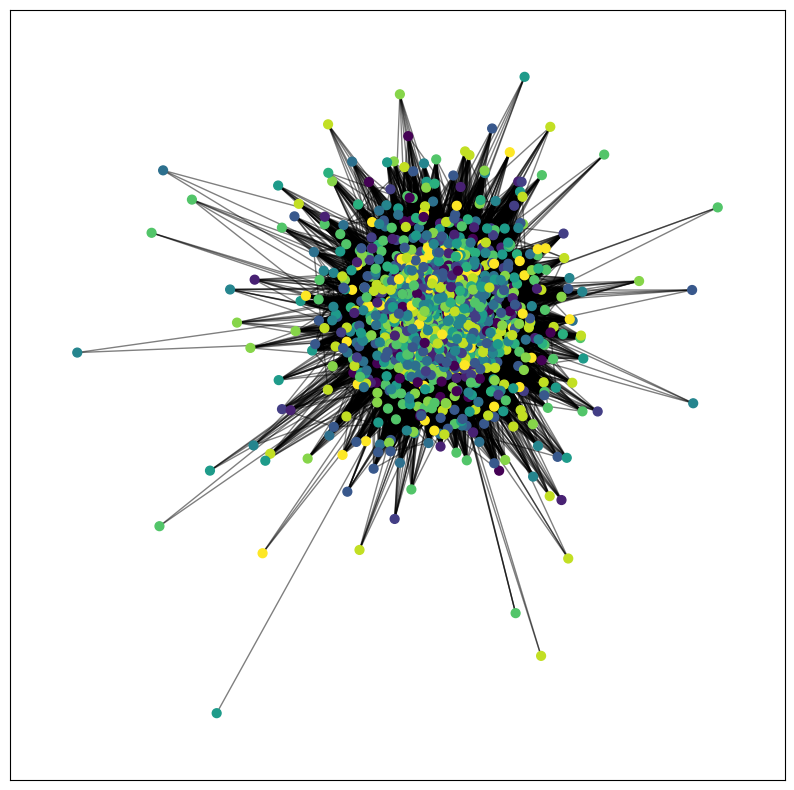

Number of communities: 12

Top 10 nodes by degree in community 4:
Node 746, Degree: 121
Node 1516, Degree: 103
Node 24, Degree: 96
Node 1284, Degree: 95
Node 997, Degree: 94
Node 732, Degree: 89
Node 402, Degree: 87
Node 246, Degree: 86
Node 787, Degree: 85
Node 714, Degree: 84

Top 10 nodes by degree in community 10:
Node 1328, Degree: 134
Node 1356, Degree: 118
Node 137, Degree: 113
Node 773, Degree: 111
Node 352, Degree: 110
Node 252, Degree: 107
Node 362, Degree: 105
Node 417, Degree: 105
Node 995, Degree: 103
Node 1543, Degree: 102

Top 10 nodes by degree in community 3:
Node 775, Degree: 131
Node 1085, Degree: 130
Node 1113, Degree: 124
Node 480, Degree: 124
Node 965, Degree: 111
Node 368, Degree: 110
Node 998, Degree: 110
Node 508, Degree: 110
Node 1199, Degree: 108
Node 1352, Degree: 107

Top 10 nodes by degree in community 2:
Node 1184, Degree: 55
Node 436, Degree: 50
Node 1326, Degree: 47
Node 1401, Degree: 47
Node 1405, Degree: 47
Node 1439, Degree: 46
Node 1341, Degree: 45


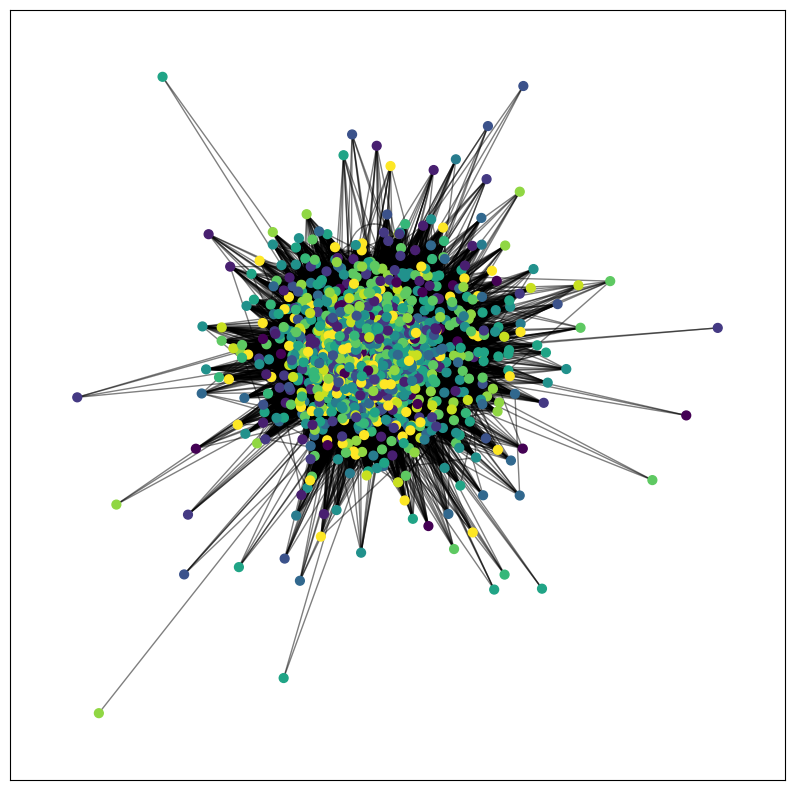

Number of communities: 13

Top 10 nodes by degree in community 4:
Node 1237, Degree: 80
Node 252, Degree: 80
Node 305, Degree: 79
Node 332, Degree: 73
Node 895, Degree: 73
Node 998, Degree: 72
Node 1313, Degree: 71
Node 480, Degree: 71
Node 835, Degree: 70
Node 877, Degree: 70

Top 10 nodes by degree in community 1:
Node 1256, Degree: 78
Node 486, Degree: 78
Node 1543, Degree: 77
Node 724, Degree: 74
Node 997, Degree: 74
Node 1703, Degree: 72
Node 394, Degree: 72
Node 721, Degree: 70
Node 566, Degree: 65
Node 1174, Degree: 64

Top 10 nodes by degree in community 2:
Node 626, Degree: 76
Node 556, Degree: 70
Node 1172, Degree: 68
Node 1489, Degree: 67
Node 1492, Degree: 66
Node 1170, Degree: 62
Node 1328, Degree: 62
Node 1390, Degree: 60
Node 393, Degree: 57
Node 970, Degree: 56

Top 10 nodes by degree in community 9:
Node 514, Degree: 111
Node 1277, Degree: 106
Node 740, Degree: 103
Node 983, Degree: 103
Node 508, Degree: 100
Node 730, Degree: 96
Node 272, Degree: 95
Node 491, Degree: 9

In [41]:
for index, conf_model in enumerate(configuration_models):
    print("Configuration Model", format(index))

    detect_and_visualize_communities(conf_model)

In [22]:
def node_percolation_simulation(graph, num_simulations=100, step=0.05):
    occupancy_probabilities = np.arange(0, 1 + step, step)
    avg_largest_component_sizes = []

    for prob in occupancy_probabilities:
        largest_component_sizes = []
        for _ in range(num_simulations):
            temp_graph = graph.copy()
            nodes_to_remove = np.random.choice(graph.nodes(), size=int((1 - prob) * graph.number_of_nodes()), replace=False)
            temp_graph.remove_nodes_from(nodes_to_remove)

            if nx.number_of_nodes(temp_graph) > 0:
                largest_component = max(nx.connected_components(temp_graph), key=len)
                largest_component_sizes.append(len(largest_component))
            else:
                largest_component_sizes.append(0)

        avg_largest_component_sizes.append(np.mean(largest_component_sizes))

    return list(zip(occupancy_probabilities, avg_largest_component_sizes))

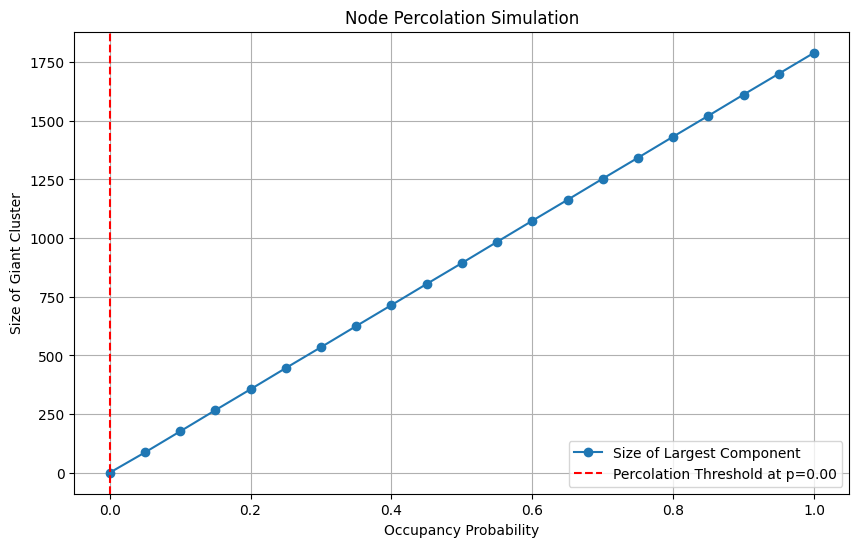

In [23]:
results = node_percolation_simulation(graph)

# Find the percolation threshold (if applicable)
percolation_threshold = next((p for p, size in results if size == 0), None)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(*zip(*results), marker='o', label='Size of Largest Component')
if percolation_threshold is not None:
    plt.axvline(x=percolation_threshold, color='r', linestyle='--', label=f'Percolation Threshold at p={percolation_threshold:.2f}')
plt.xlabel('Occupancy Probability')
plt.ylabel('Size of Giant Cluster')
plt.title('Node Percolation Simulation')
plt.grid(True)
plt.legend()
plt.show()


ER Model 1


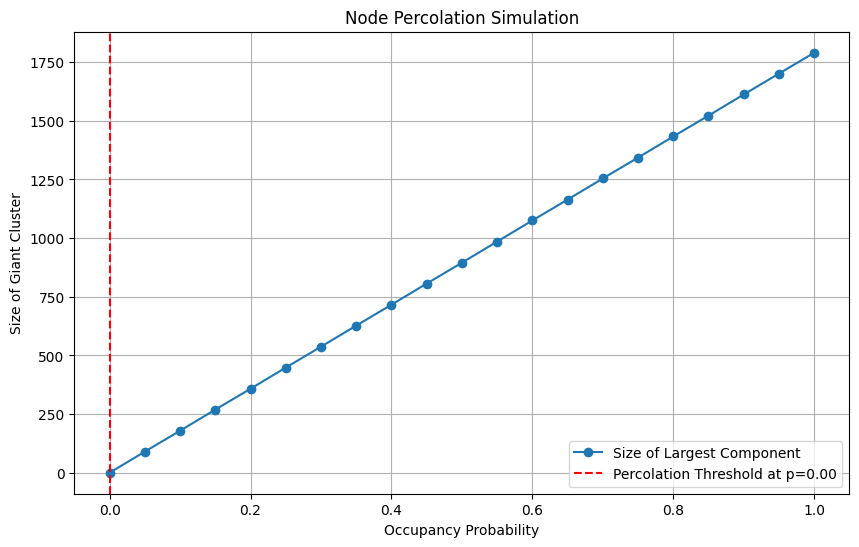

In [24]:
print("ER Model 1")
results = node_percolation_simulation(erdos_renyi_models[0])

# Find the percolation threshold (if applicable)
percolation_threshold = next((p for p, size in results if size == 0), None)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(*zip(*results), marker='o', label='Size of Largest Component')
if percolation_threshold is not None:
    plt.axvline(x=percolation_threshold, color='r', linestyle='--', label=f'Percolation Threshold at p={percolation_threshold:.2f}')
plt.xlabel('Occupancy Probability')
plt.ylabel('Size of Giant Cluster')
plt.title('Node Percolation Simulation')
plt.grid(True)
plt.legend()
plt.show()

Configuration model 1:


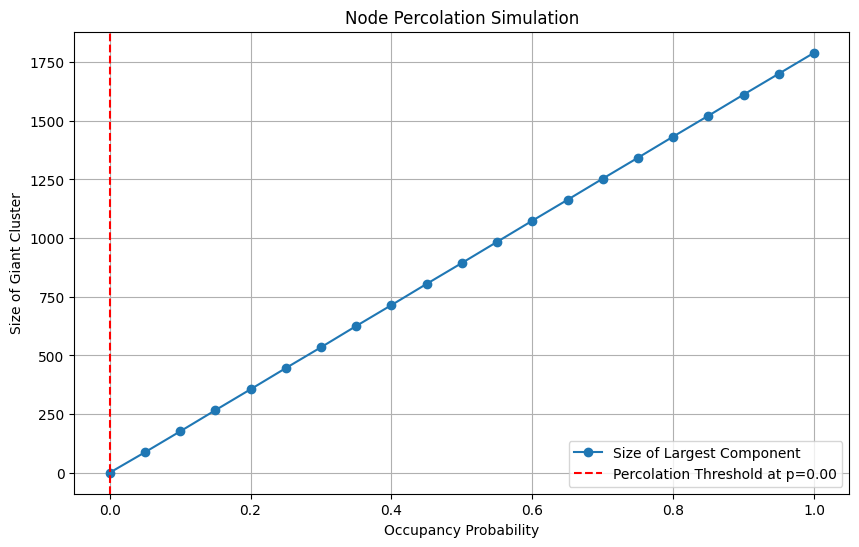

In [25]:
print("Configuration model 1:")
results = node_percolation_simulation(configuration_models[0])

# Find the percolation threshold (if applicable)
percolation_threshold = next((p for p, size in results if size == 0), None)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(*zip(*results), marker='o', label='Size of Largest Component')
if percolation_threshold is not None:
    plt.axvline(x=percolation_threshold, color='r', linestyle='--', label=f'Percolation Threshold at p={percolation_threshold:.2f}')
plt.xlabel('Occupancy Probability')
plt.ylabel('Size of Giant Cluster')
plt.title('Node Percolation Simulation')
plt.grid(True)
plt.legend()
plt.show()


In [29]:
def non_uniform_percolation(graph):
    original_size = graph.number_of_nodes()
    giant_cluster_sizes = []
    max_degrees = []
    fraction_nodes_present = []
    degree_at_disintegration = None

    while graph.number_of_nodes() > 0:
        # Calculate the size of the giant cluster
        giant_cluster = max(nx.connected_components(graph), key=len)
        giant_cluster_size = len(giant_cluster)
        giant_cluster_sizes.append(giant_cluster_size)

        # Record the maximum degree
        max_degree = max(dict(graph.degree()).items(), key=operator.itemgetter(1))[1]
        max_degrees.append(max_degree)

        # Record the fraction of nodes remaining
        fraction_nodes_present.append(graph.number_of_nodes() / original_size)

        # Check if the giant cluster size is zero and record the degree
        if giant_cluster_size == 0 and degree_at_disintegration is None:
            degree_at_disintegration = max_degree

        # Remove the node with the highest degree
        node_to_remove = max(graph.degree, key=lambda x: x[1])[0]
        graph.remove_node(node_to_remove)

    return max_degrees, giant_cluster_sizes, fraction_nodes_present, degree_at_disintegration

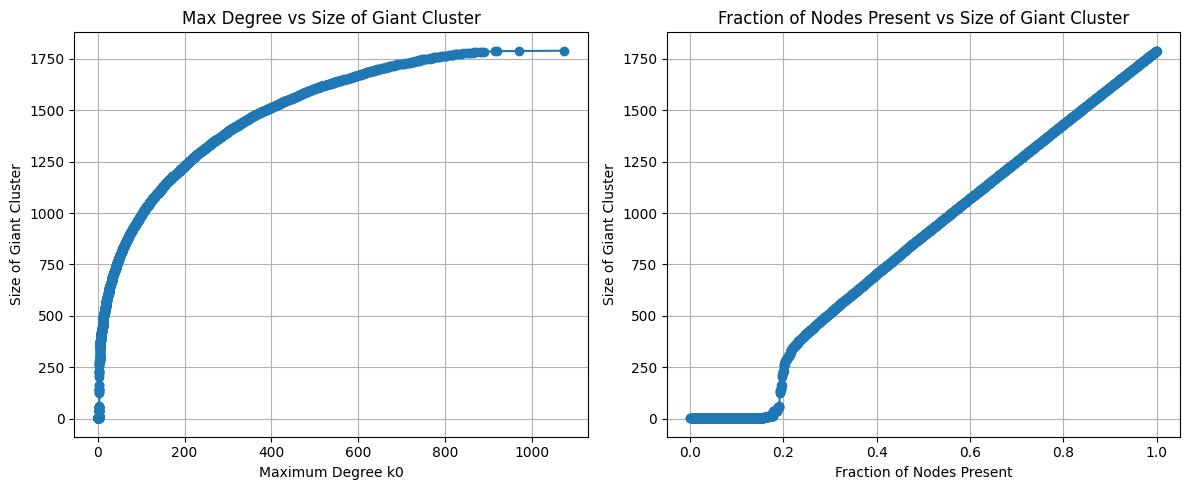

In [30]:
max_degrees, giant_cluster_sizes, fraction_nodes_present, degree_at_disintegration = non_uniform_percolation(graph.copy())

# Print the degree at which the giant cluster size becomes zero
if degree_at_disintegration is not None:
    print(f"The size of the giant cluster becomes zero at maximum degree: {degree_at_disintegration}")

# Plotting the results
plt.figure(figsize=(12, 5))

# Plot 1: Max Degree vs Size of Giant Cluster
plt.subplot(1, 2, 1)
plt.plot(max_degrees, giant_cluster_sizes, marker='o')
plt.xlabel('Maximum Degree k0')
plt.ylabel('Size of Giant Cluster')
plt.title('Max Degree vs Size of Giant Cluster')
plt.grid(True)

# Plot 2: Fraction of Nodes Present vs Size of Giant Cluster
plt.subplot(1, 2, 2)
plt.plot(fraction_nodes_present, giant_cluster_sizes, marker='o')
plt.xlabel('Fraction of Nodes Present')
plt.ylabel('Size of Giant Cluster')
plt.title('Fraction of Nodes Present vs Size of Giant Cluster')
plt.grid(True)

plt.tight_layout()
plt.show()


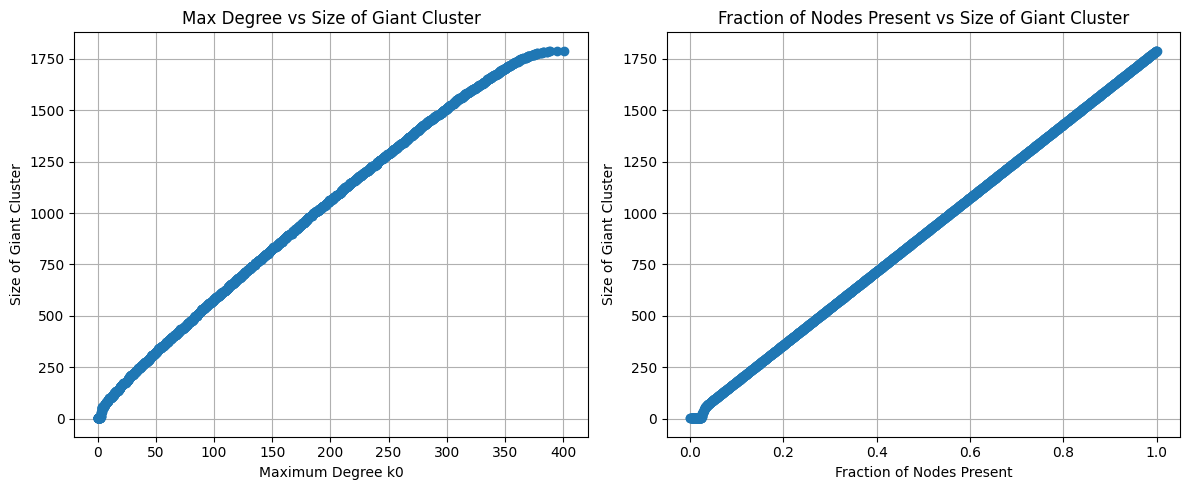

In [31]:
max_degrees, giant_cluster_sizes, fraction_nodes_present, degree_at_disintegration = non_uniform_percolation(erdos_renyi_models[0].copy())

# Print the degree at which the giant cluster size becomes zero
if degree_at_disintegration is not None:
    print(f"The size of the giant cluster becomes zero at maximum degree: {degree_at_disintegration}")

# Plotting the results
plt.figure(figsize=(12, 5))

# Plot 1: Max Degree vs Size of Giant Cluster
plt.subplot(1, 2, 1)
plt.plot(max_degrees, giant_cluster_sizes, marker='o')
plt.xlabel('Maximum Degree k0')
plt.ylabel('Size of Giant Cluster')
plt.title('Max Degree vs Size of Giant Cluster')
plt.grid(True)

# Plot 2: Fraction of Nodes Present vs Size of Giant Cluster
plt.subplot(1, 2, 2)
plt.plot(fraction_nodes_present, giant_cluster_sizes, marker='o')
plt.xlabel('Fraction of Nodes Present')
plt.ylabel('Size of Giant Cluster')
plt.title('Fraction of Nodes Present vs Size of Giant Cluster')
plt.grid(True)

plt.tight_layout()
plt.show()


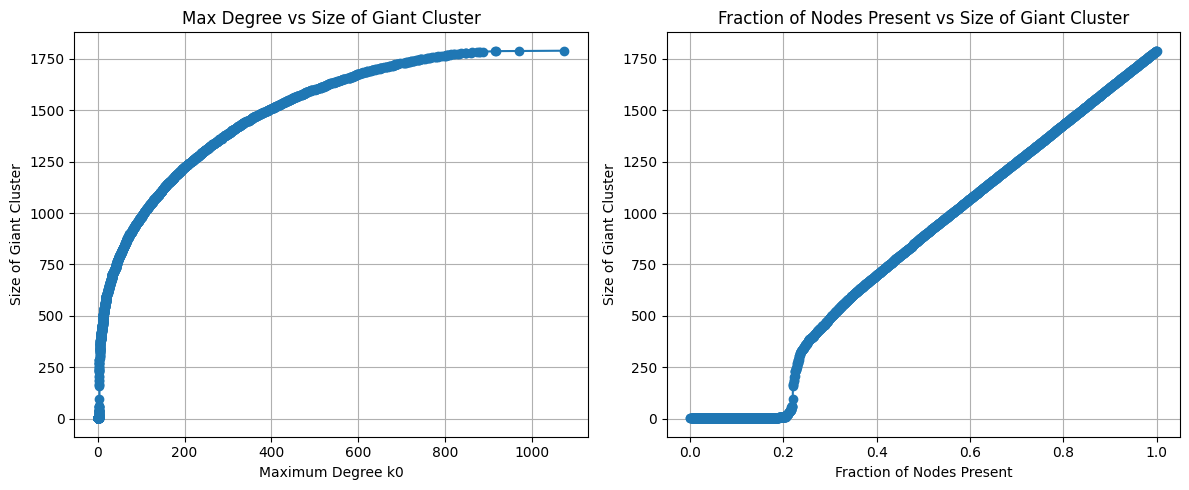

In [32]:
max_degrees, giant_cluster_sizes, fraction_nodes_present, degree_at_disintegration = non_uniform_percolation(configuration_models[0].copy())

# Print the degree at which the giant cluster size becomes zero
if degree_at_disintegration is not None:
    print(f"The size of the giant cluster becomes zero at maximum degree: {degree_at_disintegration}")

# Plotting the results
plt.figure(figsize=(12, 5))

# Plot 1: Max Degree vs Size of Giant Cluster
plt.subplot(1, 2, 1)
plt.plot(max_degrees, giant_cluster_sizes, marker='o')
plt.xlabel('Maximum Degree k0')
plt.ylabel('Size of Giant Cluster')
plt.title('Max Degree vs Size of Giant Cluster')
plt.grid(True)

# Plot 2: Fraction of Nodes Present vs Size of Giant Cluster
plt.subplot(1, 2, 2)
plt.plot(fraction_nodes_present, giant_cluster_sizes, marker='o')
plt.xlabel('Fraction of Nodes Present')
plt.ylabel('Size of Giant Cluster')
plt.title('Fraction of Nodes Present vs Size of Giant Cluster')
plt.grid(True)

plt.tight_layout()
plt.show()
